In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder

In [3]:
dataframe_date_fruits=pd.read_excel(r"D:\datasets2\Date_Fruit_Datasets\Date_Fruit_Datasets.xlsx")

In [4]:
dataframe_date_fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [5]:
dataframe_date_fruits.describe()

AREA    PERIMETER   MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
count     898.000000   898.000000   898.000000  898.000000    898.000000   
mean   298295.207127  2057.660953   750.811994  495.872785      0.737468   
std    107245.205337   410.012459   144.059326  114.268917      0.088727   
min      1987.000000   911.828000   336.722700    2.283200      0.344800   
25%    206948.000000  1726.091500   641.068650  404.684375      0.685625   
50%    319833.000000  2196.345450   791.363400  495.054850      0.754700   
75%    382573.000000  2389.716575   858.633750  589.031700      0.802150   
max    546063.000000  2811.997100  1222.723000  766.453600      1.000000   

          EQDIASQ    SOLIDITY    CONVEX_AREA      EXTENT  ASPECT_RATIO  ...  \
count  898.000000  898.000000     898.000000  898.000000    898.000000  ...   
mean   604.577938    0.981840  303845.592428    0.736267      2.131102  ...   
std    119.593888    0.018157  108815.656947    0.053745     17.820778  ...   
min     50.298400    0.836600    2257.000000    0.512300      1.065300  ...   
25%    513.317075    0.978825  210022.750000    0.705875      1.373725  ...   
50%    638.140950    0.987300  327207.000000    0.746950      1.524150  ...   
75%    697.930525    0.991800  388804.000000    0.775850      1.674750  ...   
max    833.827900    0.997400  552598.000000    0.856200    535.525700  ...   

           SkewRB  KurtosisRR  KurtosisRG  KurtosisRB     EntropyRR  \
count  898.000000  898.000000  898.000000  898.000000  8.980000e+02   
mean     0.250518    4.247845    5.110894    3.780928 -3.185021e+10   
std      0.632918    2.892357    3.745463    2.049831  2.037241e+10   
min     -1.029100    1.708200    1.607600    1.767200 -1.091224e+11   
25%     -0.196950    2.536625    2.508850    2.577275 -4.429444e+10   
50%      0.135550    3.069800    3.127800    3.080700 -2.826156e+10   
75%      0.593950    4.449850    7.320400    4.283125 -1.460482e+10   
max      3.092300   26.171100   26.736700   32.249500 -1.627316e+08   

          EntropyRG     EntropyRB  ALLdaub4RR  ALLdaub4RG  ALLdaub4RB  
count  8.980000e+02  8.980000e+02  898.000000  898.000000  898.000000  
mean  -2.901860e+10 -2.771876e+10   50.082888   48.805681   48.098393  
std    1.712952e+10  1.484137e+10   16.063125   14.125911   10.813862  
min   -9.261697e+10 -8.747177e+10   15.191100   20.524700   22.130000  
25%   -3.894638e+10 -3.564534e+10   38.224425   38.654525   39.250725  
50%   -2.620990e+10 -2.392928e+10   53.841300   50.337800   49.614100  
75%   -1.433105e+10 -1.660367e+10   63.063350   59.573600   56.666675  
max   -5.627727e+08 -4.370435e+08   79.828900   83.064900   74.104600  

[8 rows x 34 columns]

In [6]:
dataframe_date_fruits.duplicated().sum()

0

In [7]:
dataframe_date_fruits.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [8]:
Target_feature=dataframe_date_fruits['Class']
dataframe_date_fruits_independent_features=dataframe_date_fruits.drop('Class',axis=1)

In [9]:
correlation_matrix=dataframe_date_fruits_independent_features.corr()
correlation_matrix

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
AREA           1.000000   0.956494    0.878893    0.954899     -0.370303   
PERIMETER      0.956494   1.000000    0.960734    0.859990     -0.166816   
MAJOR_AXIS     0.878893   0.960734    1.000000    0.721133      0.063090   
MINOR_AXIS     0.954899   0.859990    0.721133    1.000000     -0.607120   
ECCENTRICITY  -0.370303  -0.166816    0.063090   -0.607120      1.000000   
EQDIASQ        0.993243   0.959938    0.886277    0.948006     -0.335085   
SOLIDITY       0.027371  -0.133857   -0.166982    0.059613     -0.220434   
CONVEX_AREA    0.998886   0.963489    0.886948    0.951470     -0.356565   
EXTENT        -0.086286  -0.214632   -0.279951    0.028003     -0.342775   
ASPECT_RATIO  -0.095342   0.018308    0.111631   -0.150407      0.110238   
ROUNDNESS      0.044346  -0.235744   -0.355258    0.243655     -0.659626   
COMPACTNESS    0.315197   0.078554   -0.164403    0.551966     -0.917470   
SHAPEFACTOR_1 -0.124025  -0.011718    0.081976   -0.176214      0.114084   
SHAPEFACTOR_2 -0.861870  -0.934379   -0.959569   -0.736051     -0.026945   
SHAPEFACTOR_3  0.332349   0.103959   -0.136056    0.572201     -0.967224   
SHAPEFACTOR_4  0.039321  -0.036744   -0.048096   -0.004244     -0.020083   
MeanRR        -0.353447  -0.451033   -0.530236   -0.196257     -0.252334   
MeanRG        -0.380730  -0.468553   -0.538479   -0.231831     -0.238878   
MeanRB        -0.376241  -0.448371   -0.506743   -0.246280     -0.180566   
StdDevRR      -0.320764  -0.386137   -0.442289   -0.196623     -0.142801   
StdDevRG      -0.172480  -0.201908   -0.248626   -0.077724     -0.097034   
StdDevRB      -0.048223  -0.176466   -0.284034    0.095411     -0.393799   
SkewRR         0.376400   0.488147    0.551523    0.229831      0.223854   
SkewRG         0.401733   0.484734    0.550014    0.259649      0.184643   
SkewRB         0.433323   0.415364    0.412055    0.396219     -0.177619   
KurtosisRR     0.218253   0.313334    0.366579    0.093267      0.215284   
KurtosisRG     0.326335   0.398168    0.460468    0.189532      0.194135   
KurtosisRB     0.381096   0.364269    0.347940    0.354742     -0.179358   
EntropyRR     -0.359332  -0.266206   -0.146311   -0.466776      0.431537   
EntropyRG     -0.393124  -0.294308   -0.167972   -0.501442      0.463969   
EntropyRB     -0.506256  -0.416802   -0.297395   -0.585234      0.442189   
ALLdaub4RR    -0.353446  -0.451028   -0.530231   -0.196256     -0.252331   
ALLdaub4RG    -0.380747  -0.468571   -0.538497   -0.231847     -0.238875   
ALLdaub4RB    -0.376277  -0.448409   -0.506782   -0.246312     -0.180563   

                EQDIASQ  SOLIDITY  CONVEX_AREA    EXTENT  ASPECT_RATIO  ...  \
AREA           0.993243  0.027371     0.998886 -0.086286     -0.095342  ...   
PERIMETER      0.959938 -0.133857     0.963489 -0.214632      0.018308  ...   
MAJOR_AXIS     0.886277 -0.166982     0.886948 -0.279951      0.111631  ...   
MINOR_AXIS     0.948006  0.059613     0.951470  0.028003     -0.150407  ...   
ECCENTRICITY  -0.335085 -0.220434    -0.356565 -0.342775      0.110238  ...   
EQDIASQ        1.000000  0.018777     0.993397 -0.112353     -0.157370  ...   
SOLIDITY       0.018777  1.000000    -0.016449  0.392552     -0.189234  ...   
CONVEX_AREA    0.993397 -0.016449     1.000000 -0.107403     -0.095457  ...   
EXTENT        -0.112353  0.392552    -0.107403  1.000000      0.067207  ...   
ASPECT_RATIO  -0.157370 -0.189234    -0.095457  0.067207      1.000000  ...   
ROUNDNESS      0.035564  0.611010     0.015083  0.470357     -0.410407  ...   
COMPACTNESS    0.301535  0.384826     0.297794  0.365187     -0.422474  ...   
SHAPEFACTOR_1 -0.186715 -0.188307    -0.124221  0.072829      0.999515  ...   
SHAPEFACTOR_2 -0.887398  0.047237    -0.865527  0.216175     -0.055882  ...   
SHAPEFACTOR_3  0.304564  0.367759     0.313861  0.394855     -0.243065  ...   
SHAPEFACTOR_4  0.037291  0.874596     0.005152  0.229890     -0.134463  ...   
MeanRR        -

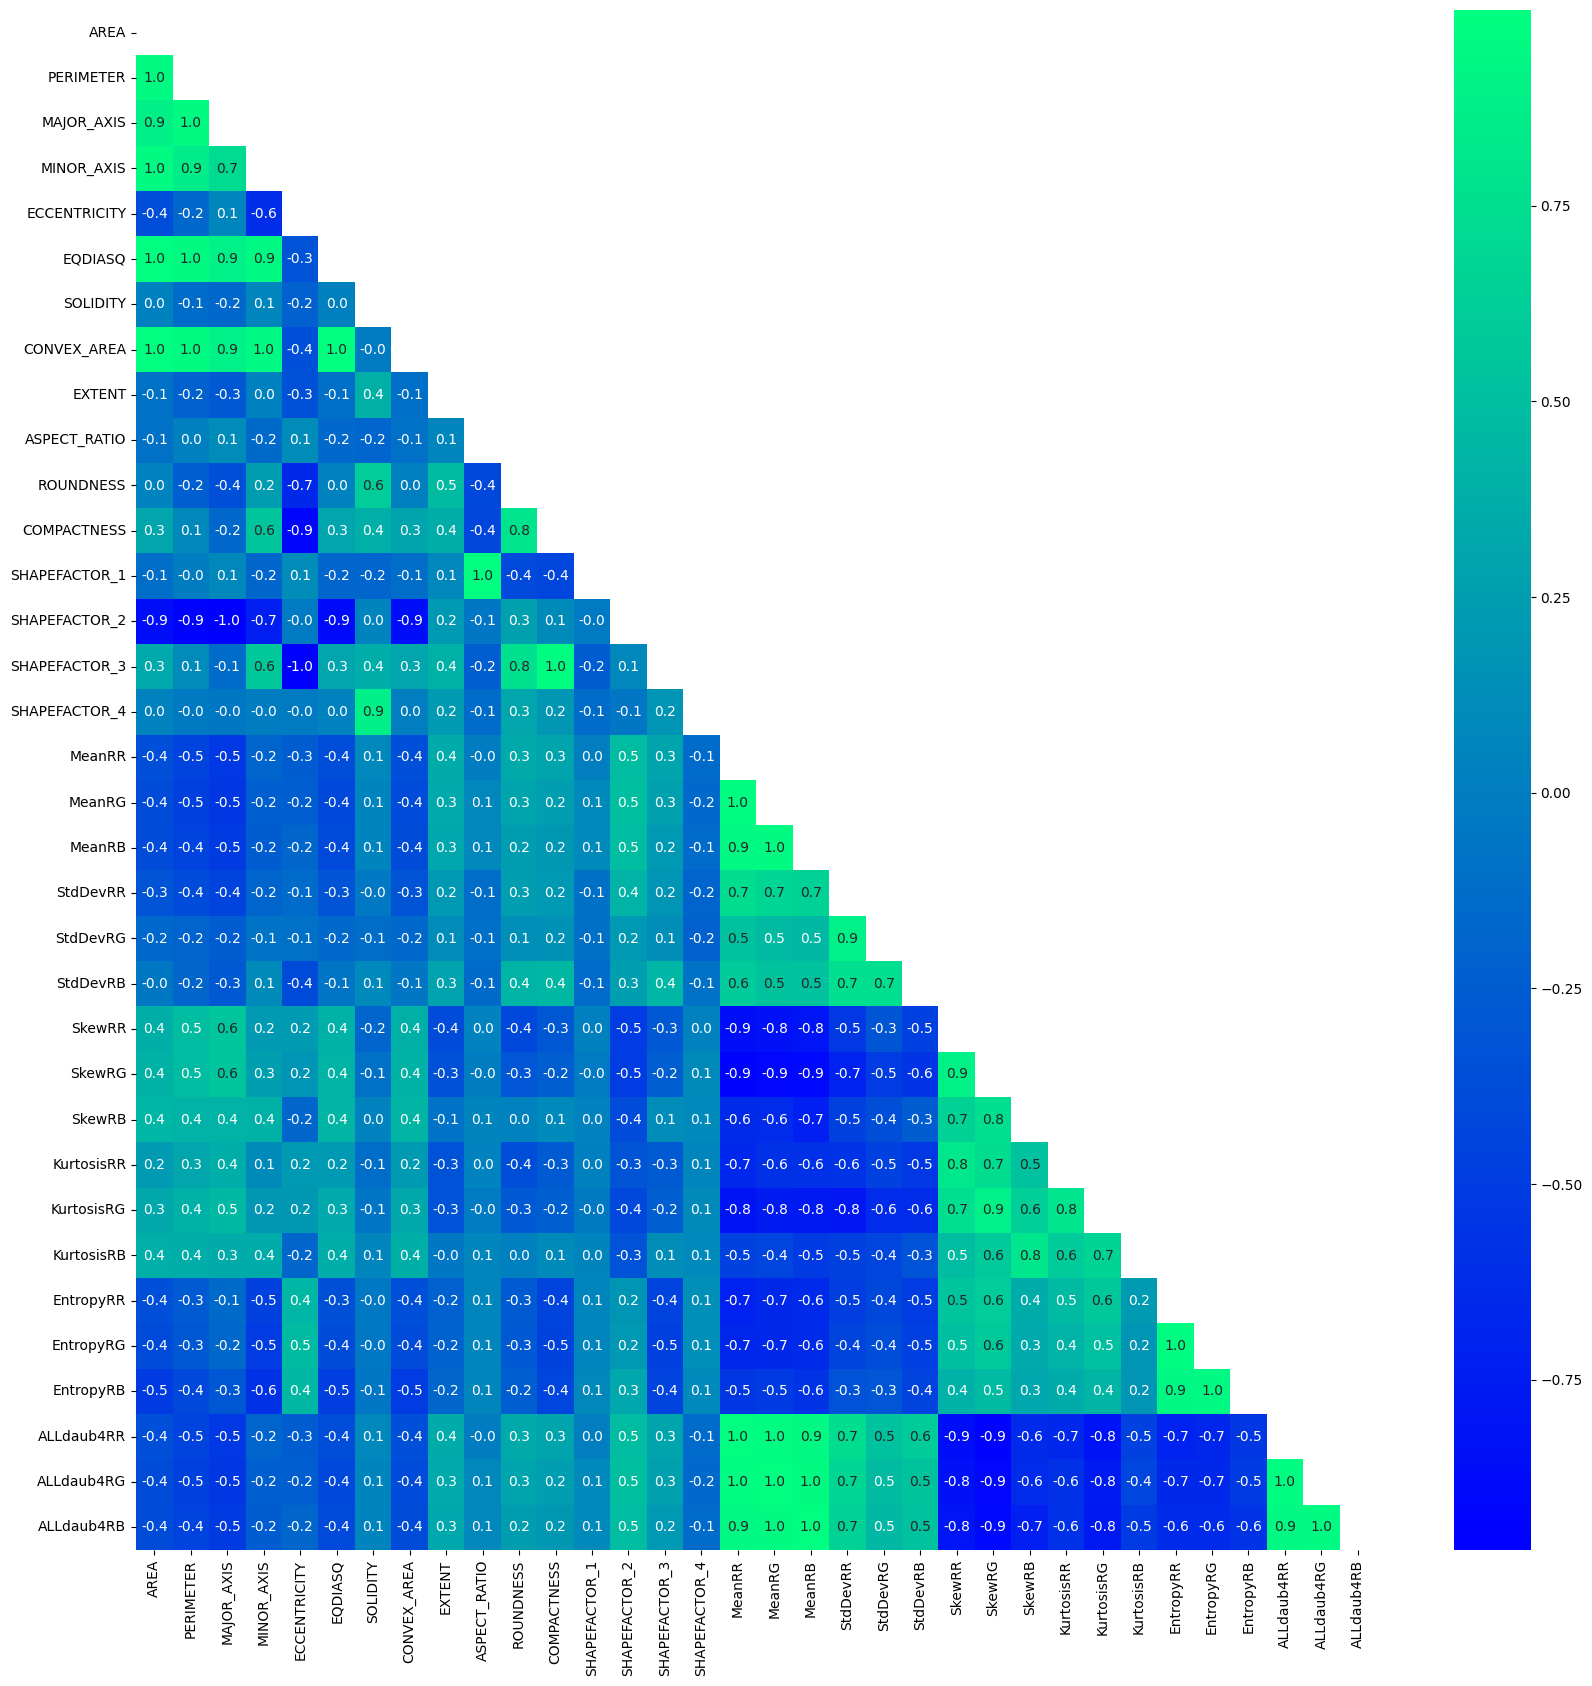

In [10]:
plt.figure(figsize=(20,20))
mask=np.triu(np.ones_like(correlation_matrix,dtype=np.bool_))
sns.heatmap(data=correlation_matrix ,annot=True ,fmt='.1f' ,cmap='winter',mask=mask)
plt.show()

In [11]:
def Multicollinearity_removing(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) >threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features=Multicollinearity_removing(dataframe_date_fruits_independent_features,0.7)
dataframe_date_fruits_after_removing_Multicollinearity=dataframe_date_fruits_independent_features.drop(corr_features,axis=1)
dataframe_date_fruits_after_removing_Multicollinearity

AREA  ECCENTRICITY  SOLIDITY  EXTENT  ASPECT_RATIO  ROUNDNESS  \
0    422163        0.6373    0.9947  0.7831        1.2976     0.9374   
1    338136        0.5690    0.9974  0.7795        1.2161     0.9773   
2    526843        0.6494    0.9962  0.7657        1.3150     0.9446   
3    416063        0.6266    0.9948  0.7759        1.2831     0.9458   
4    347562        0.6465    0.9908  0.7569        1.3108     0.9358   
..      ...           ...       ...     ...           ...        ...   
893  255403        0.7241    0.9785  0.7269        1.4499     0.8658   
894  365924        0.7644    0.9466  0.6695        1.5510     0.6475   
895  254330        0.8126    0.9925  0.7240        1.7159     0.8609   
896  238955        0.7873    0.9604  0.6954        1.6220     0.8263   
897  343792        0.7607    0.9781  0.6941        1.5405     0.8243   

     SHAPEFACTOR_2    MeanRR  SkewRR    EntropyRR  
0           0.0015  117.4466 -0.5661 -59191263232  
1           0.0018  100.0578 -0.2328 -34233065472  
2           0.0014  130.9558 -0.7152 -93948354560  
3           0.0016   86.7798  0.4584 -32074307584  
4           0.0017  105.5484 -0.3552 -39980974080  
..             ...       ...     ...          ...  
893         0.0019   98.1696 -0.2737 -25296416768  
894         0.0015   93.6238 -0.3319 -31605219328  
895         0.0017   88.2526  0.1838 -22242772992  
896         0.0018  102.4622  0.3400 -26048595968  
897         0.0016   94.6863  0.3382 -31983476736  

[898 rows x 10 columns]

In [13]:
select=SelectFromModel(rf(n_estimators=100,random_state=0))
select.fit(dataframe_date_fruits_after_removing_Multicollinearity,Target_feature)

support=select.get_support()

dataframe_date_fruits_after_features_engineering=dataframe_date_fruits_after_removing_Multicollinearity.loc[:,support].columns.tolist()

print(dataframe_date_fruits_after_features_engineering)

print(rf(n_estimators=100,random_state=0).fit(dataframe_date_fruits_after_removing_Multicollinearity,Target_feature).feature_importances_)

['AREA', 'SHAPEFACTOR_2', 'MeanRR', 'EntropyRR']
[0.19766873 0.05549838 0.05501876 0.0321474  0.05939938 0.08801203
 0.12904975 0.15297646 0.07686728 0.15336183]


In [14]:
dataframe_date_fruits_after_features_engineering=dataframe_date_fruits_after_removing_Multicollinearity.loc[:,support]
dataframe_date_fruits_after_features_engineering

AREA  SHAPEFACTOR_2    MeanRR    EntropyRR
0    422163         0.0015  117.4466 -59191263232
1    338136         0.0018  100.0578 -34233065472
2    526843         0.0014  130.9558 -93948354560
3    416063         0.0016   86.7798 -32074307584
4    347562         0.0017  105.5484 -39980974080
..      ...            ...       ...          ...
893  255403         0.0019   98.1696 -25296416768
894  365924         0.0015   93.6238 -31605219328
895  254330         0.0017   88.2526 -22242772992
896  238955         0.0018  102.4622 -26048595968
897  343792         0.0016   94.6863 -31983476736

[898 rows x 4 columns]

In [15]:
Target_feature.value_counts()

Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64

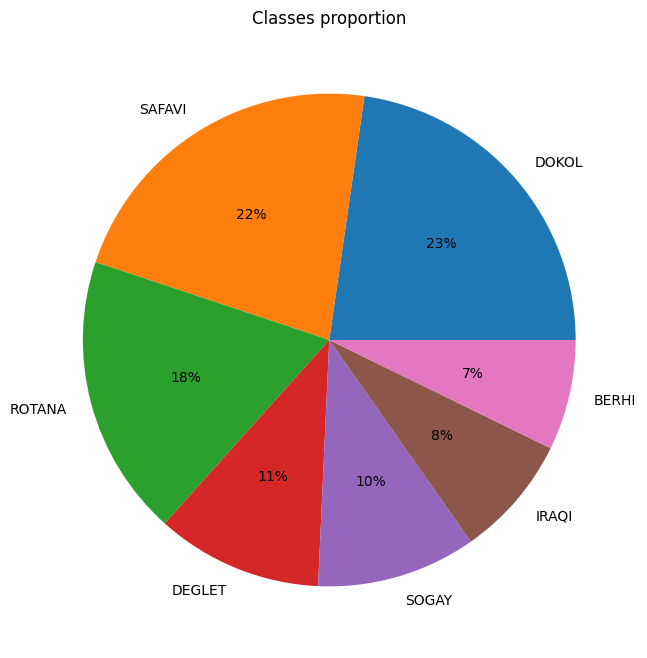

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(dataframe_date_fruits['Class'].value_counts(), labels=dataframe_date_fruits['Class'].value_counts().index, autopct = '%0.0f%%')
plt.title('Classes proportion')
plt.show()

In [31]:
def draw_distributions(features, column):
  plt.figure(figsize=(13, 4))
  plt.title(f'{column}')

  sns.histplot(features, x=column, kde=True, hue='Class')
  
  plt.show()

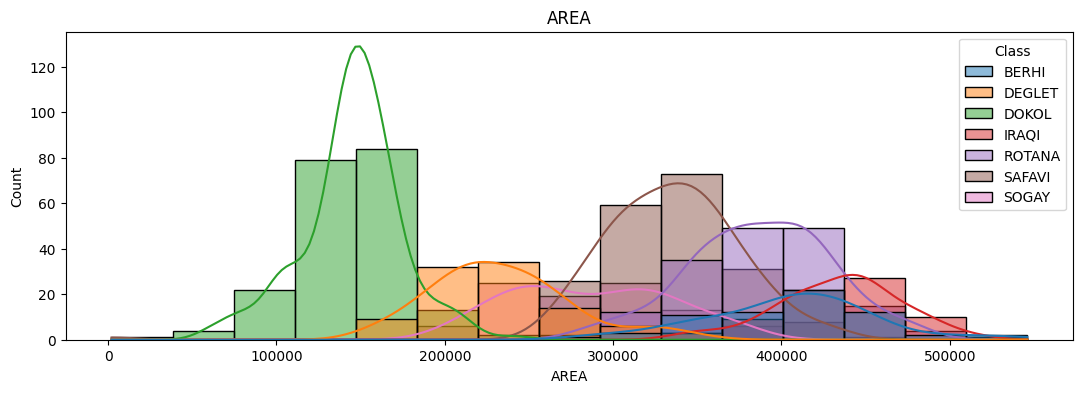

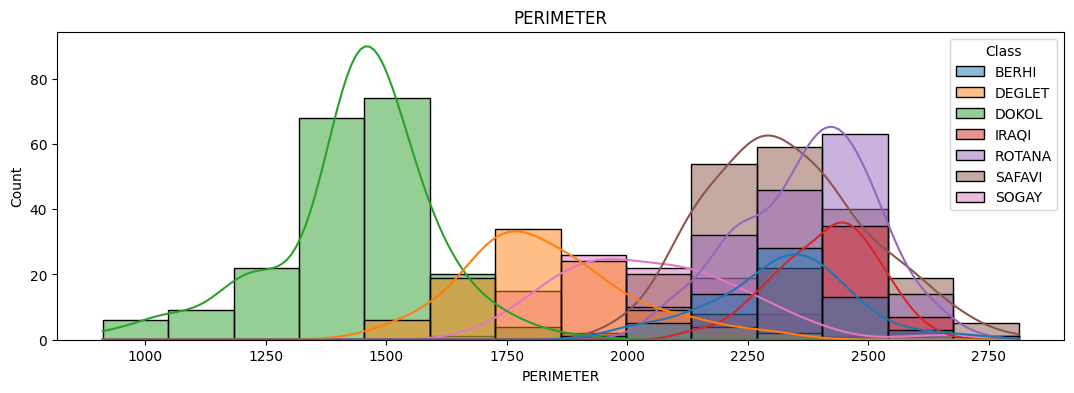

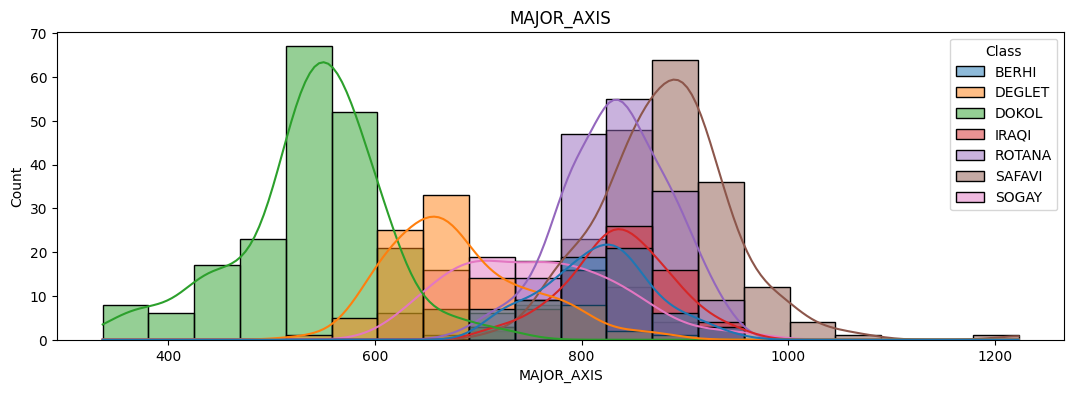

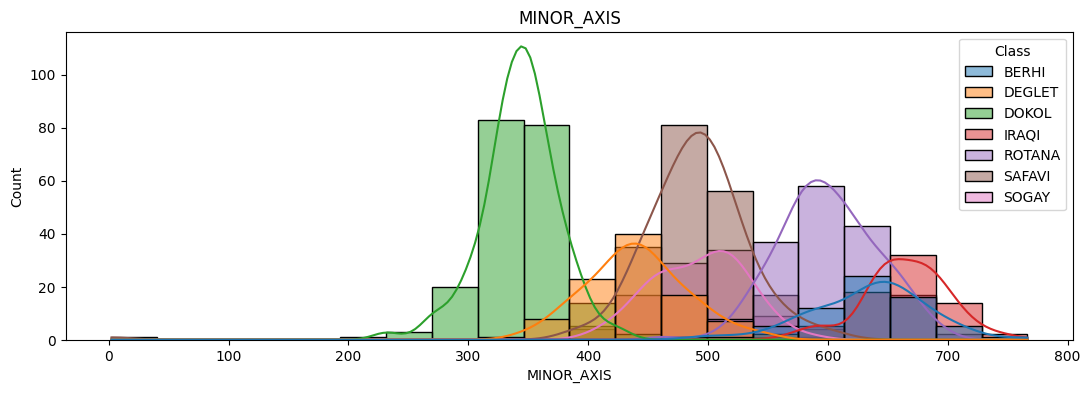

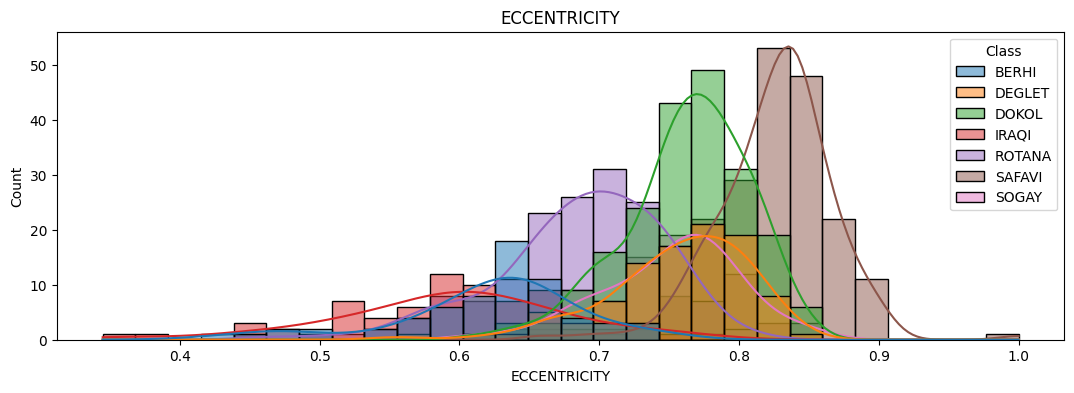

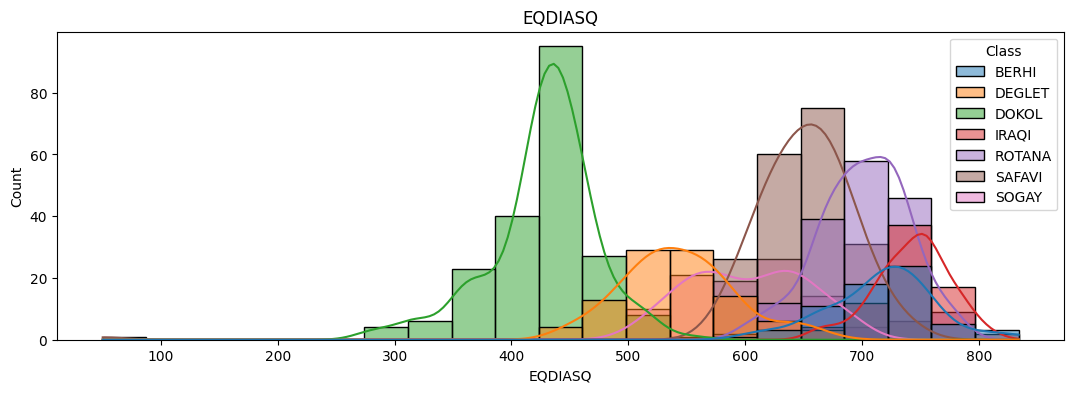

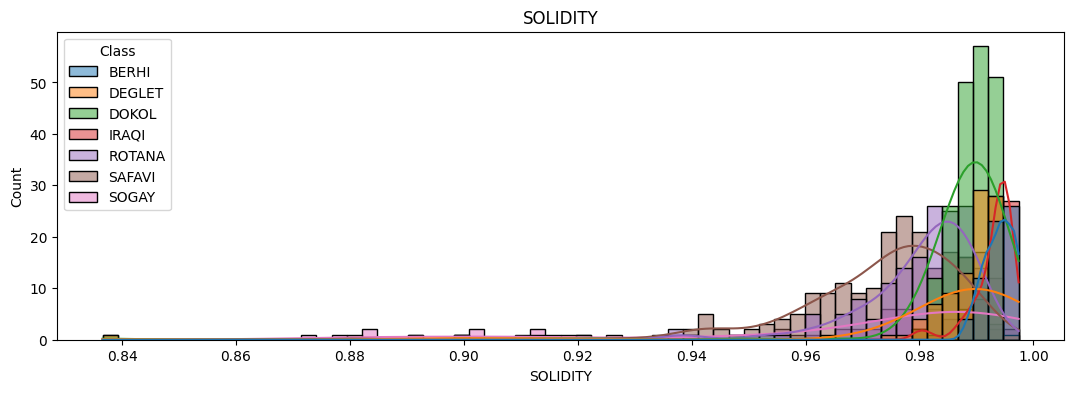

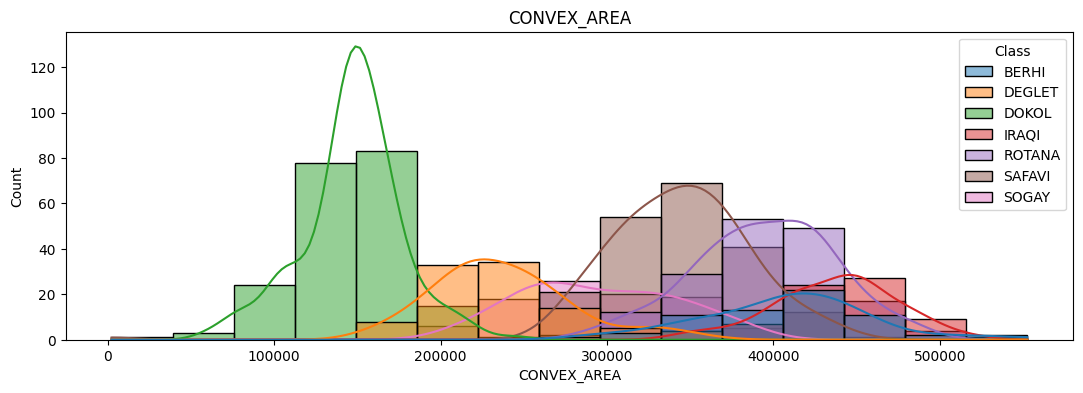

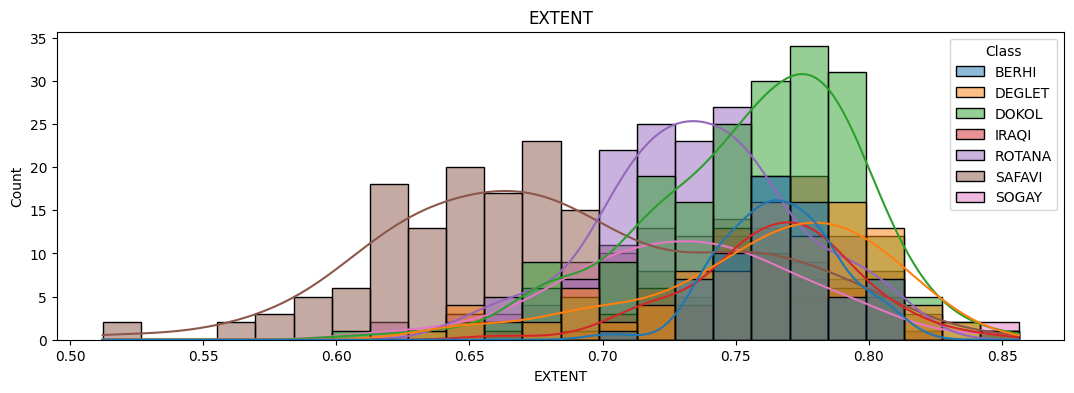

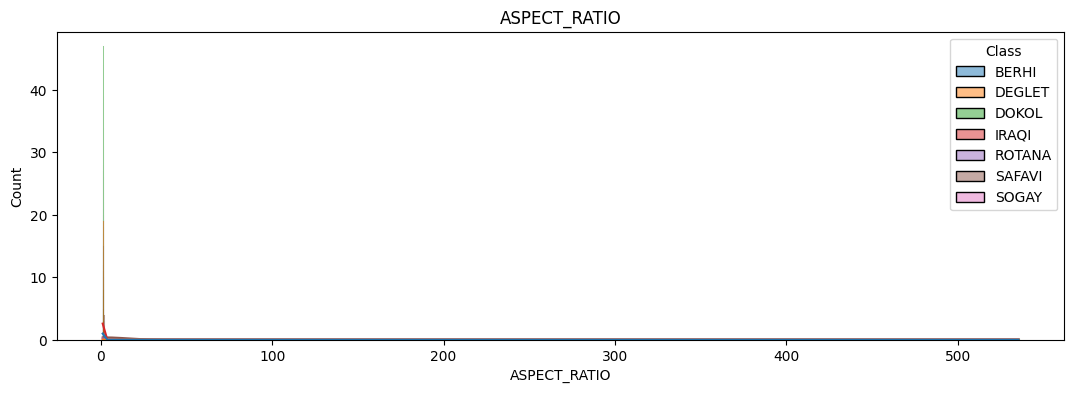

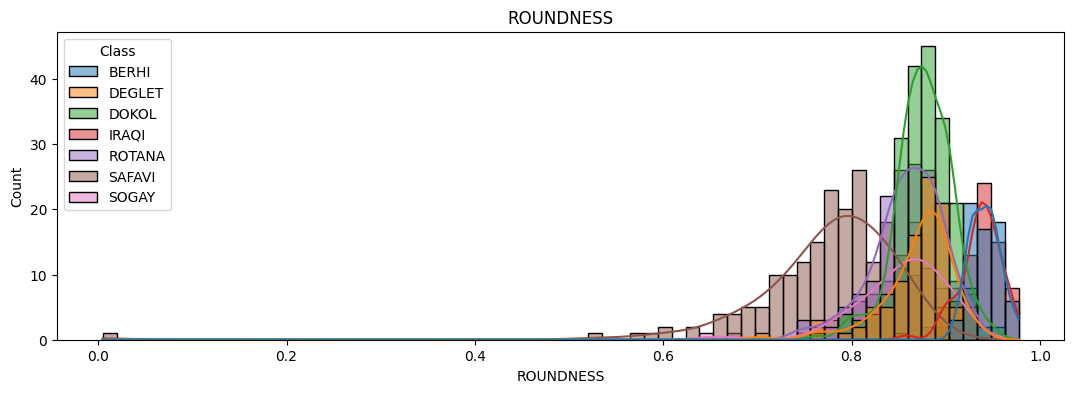

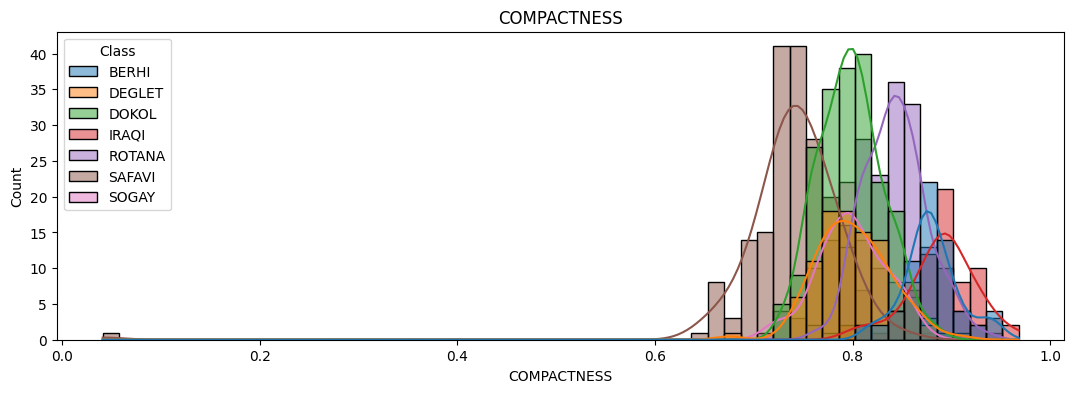

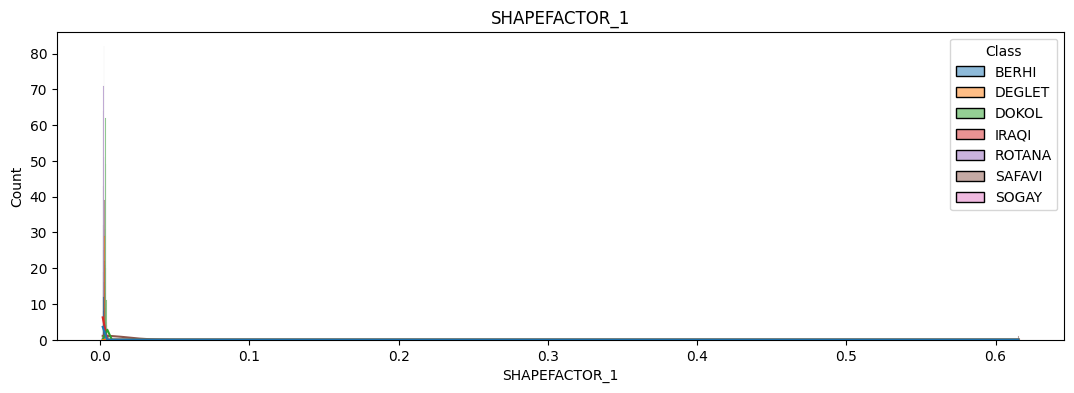

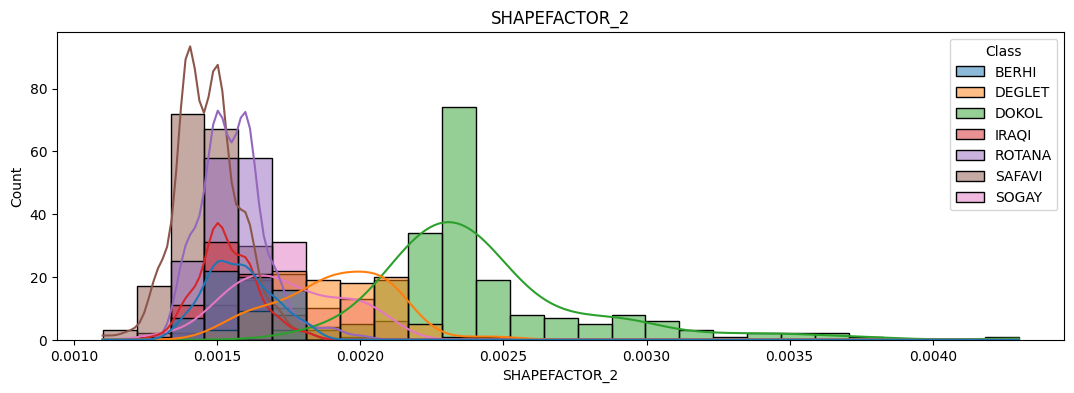

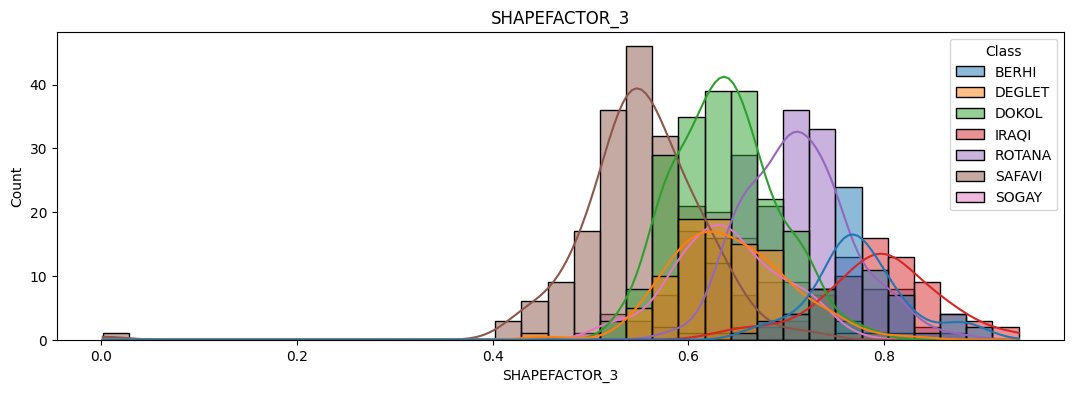

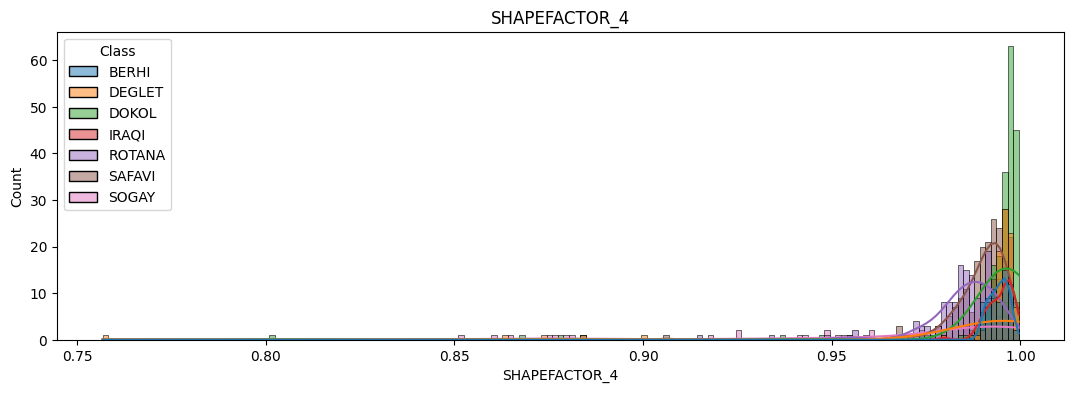

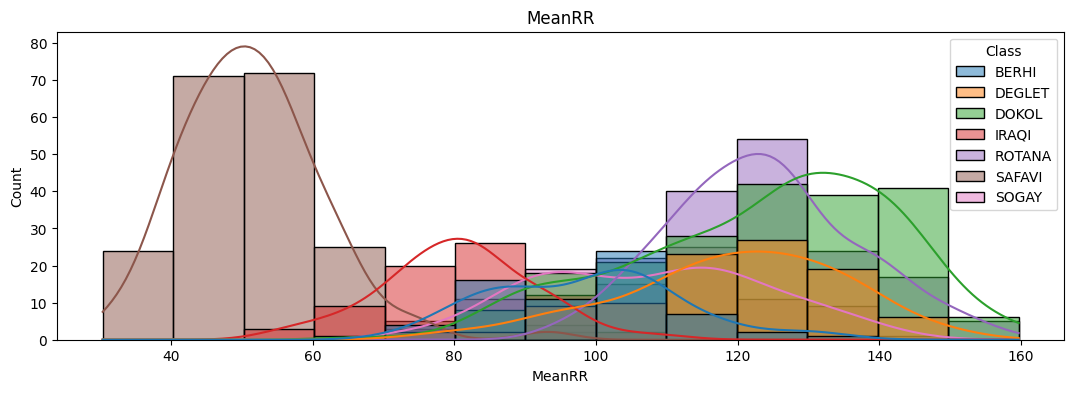

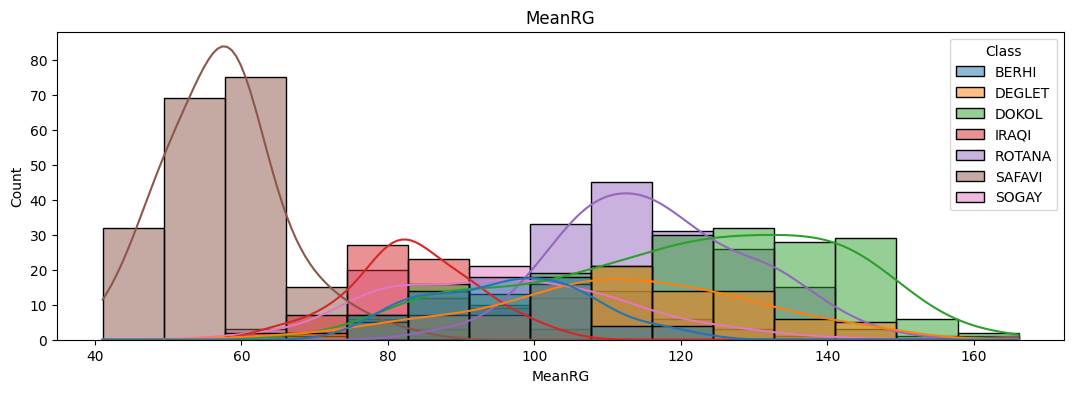

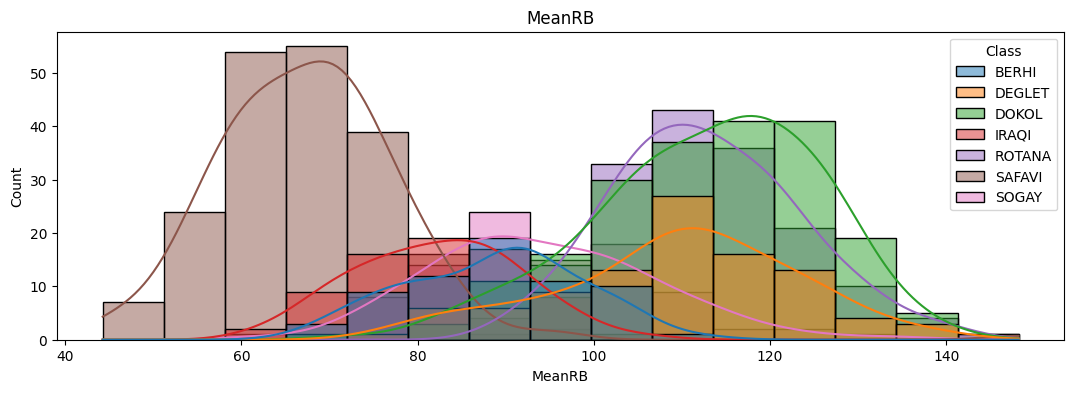

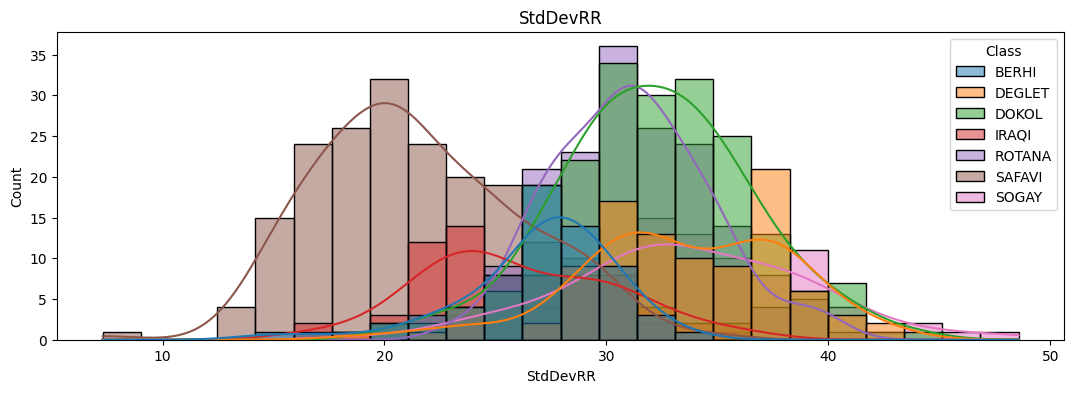

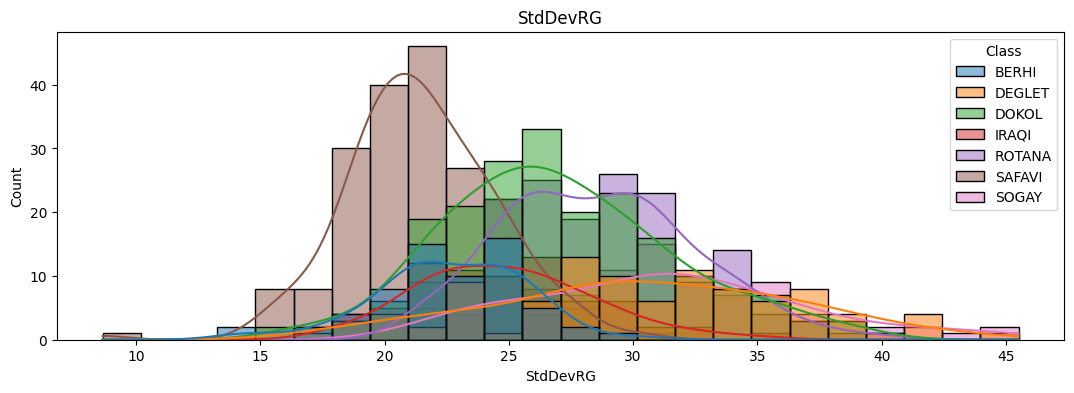

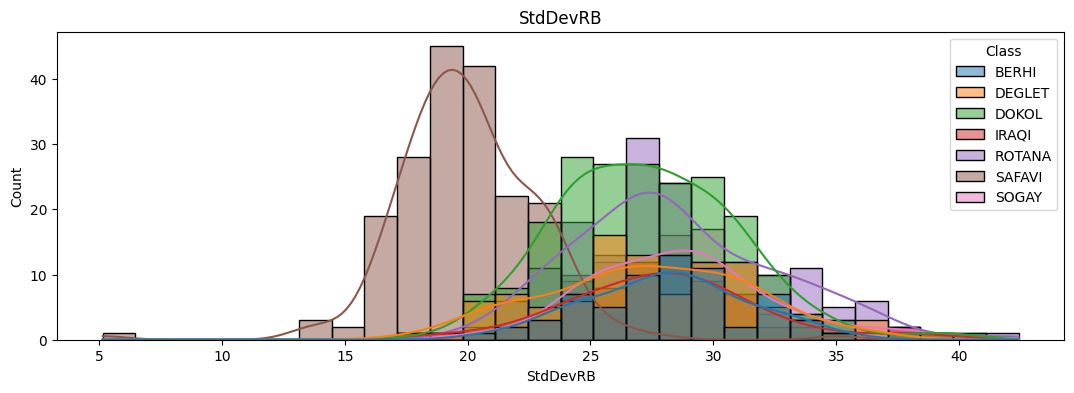

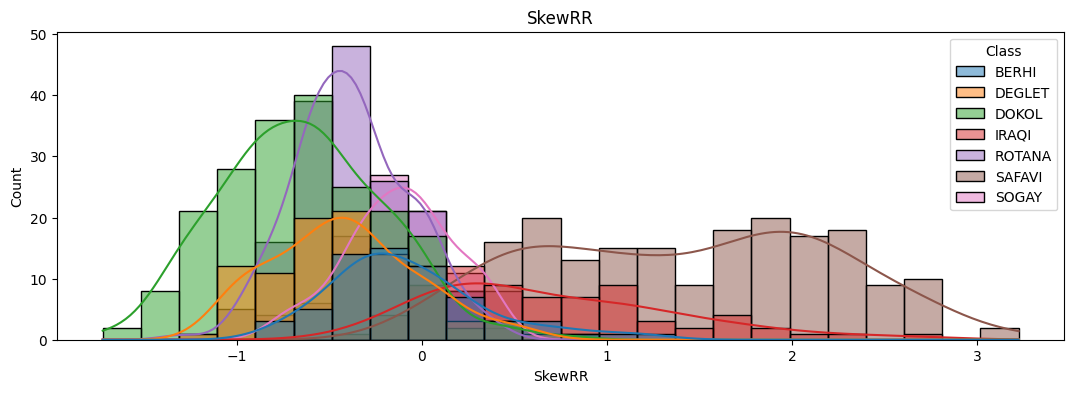

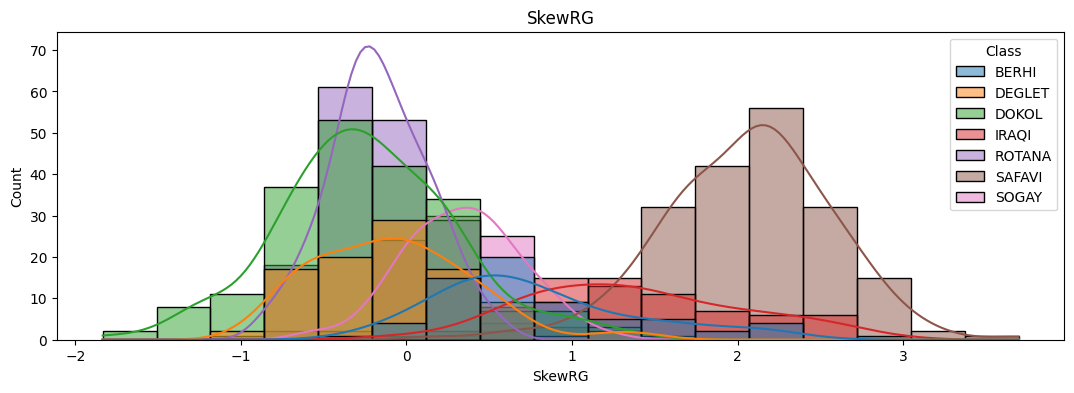

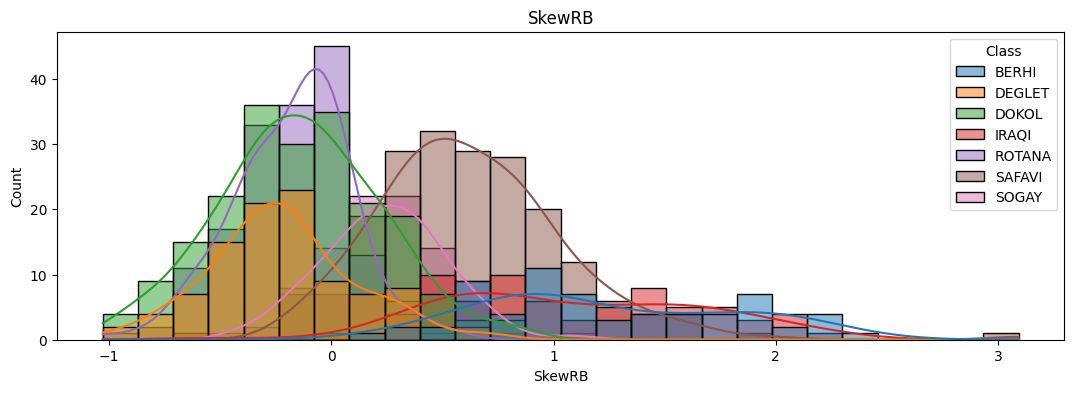

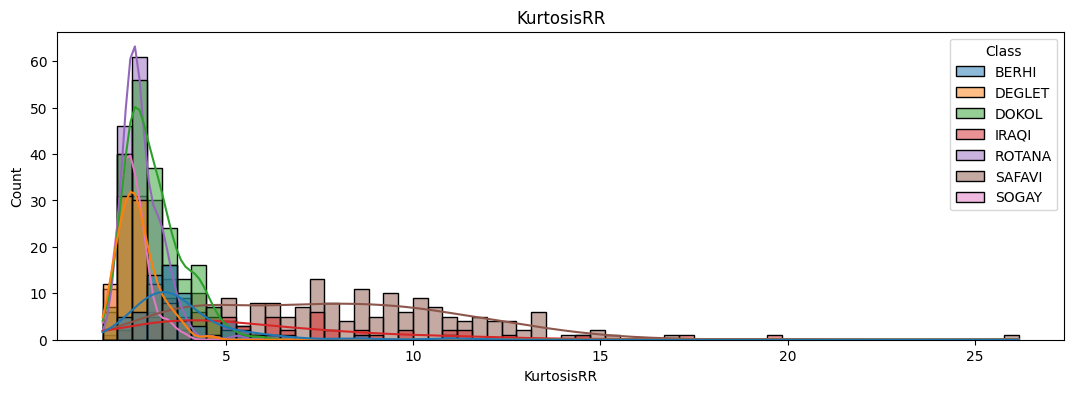

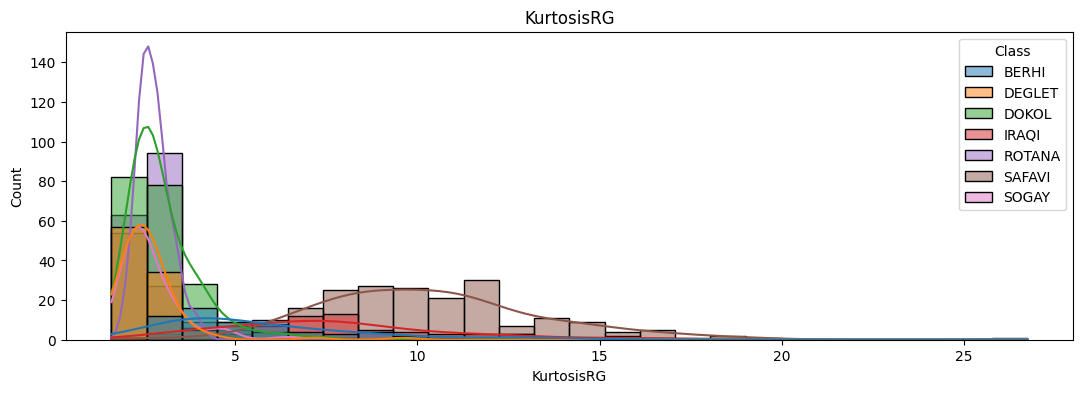

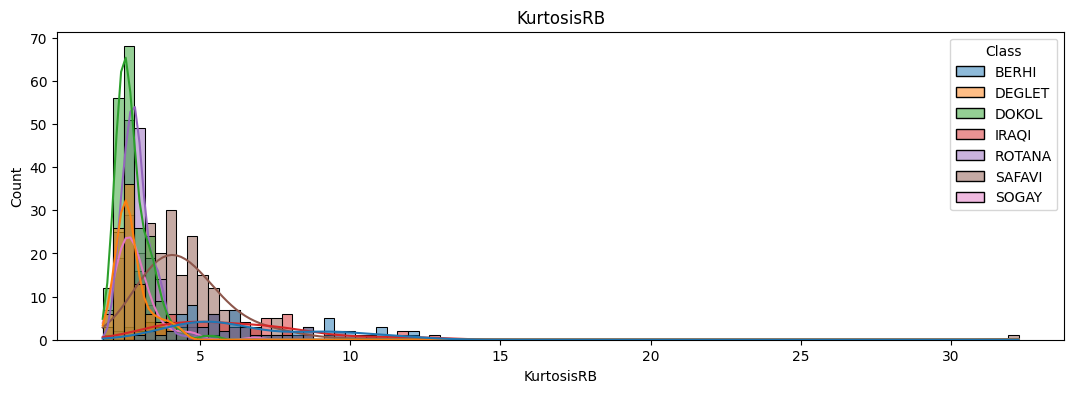

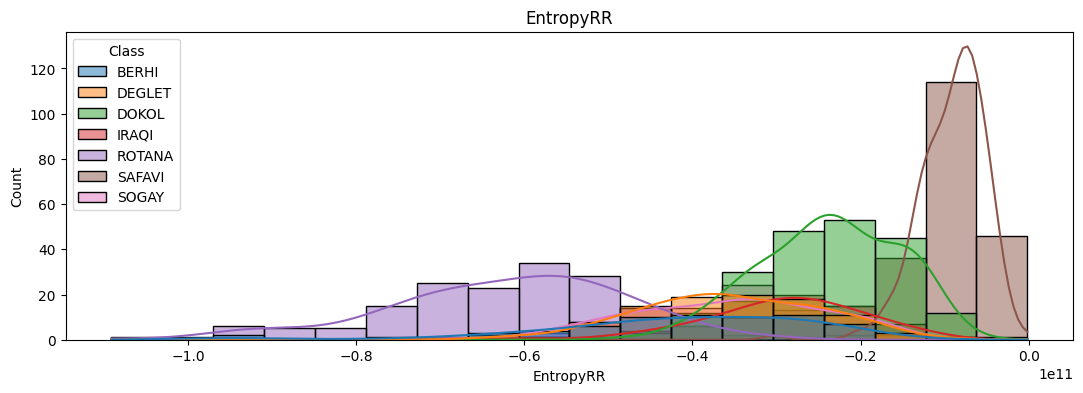

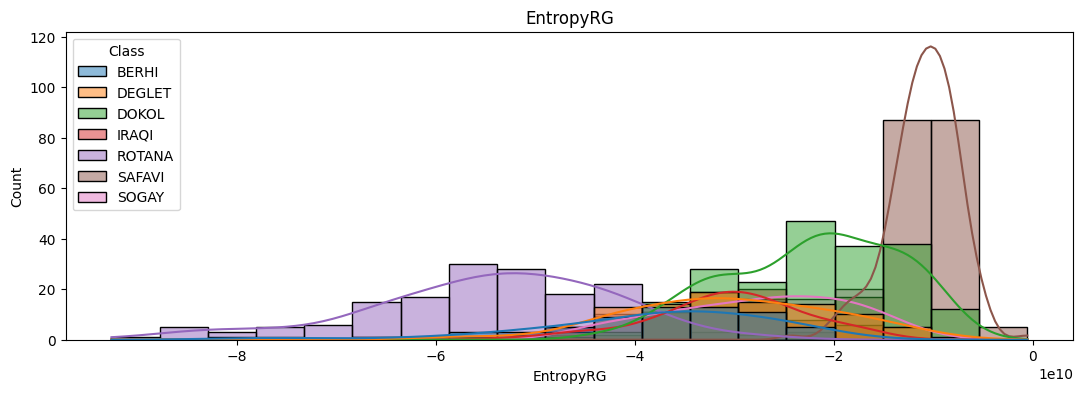

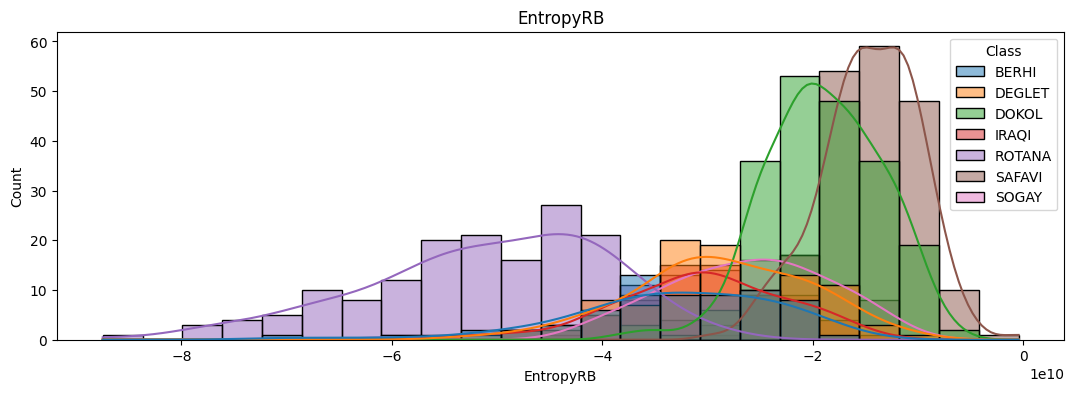

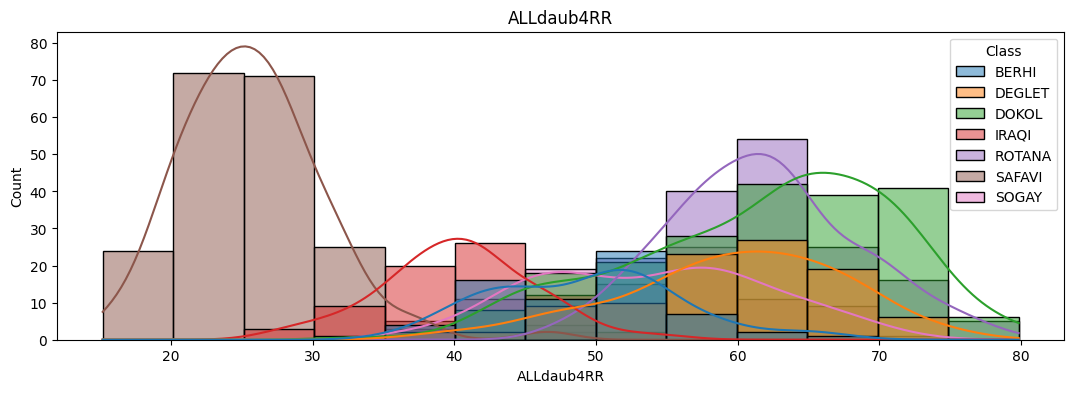

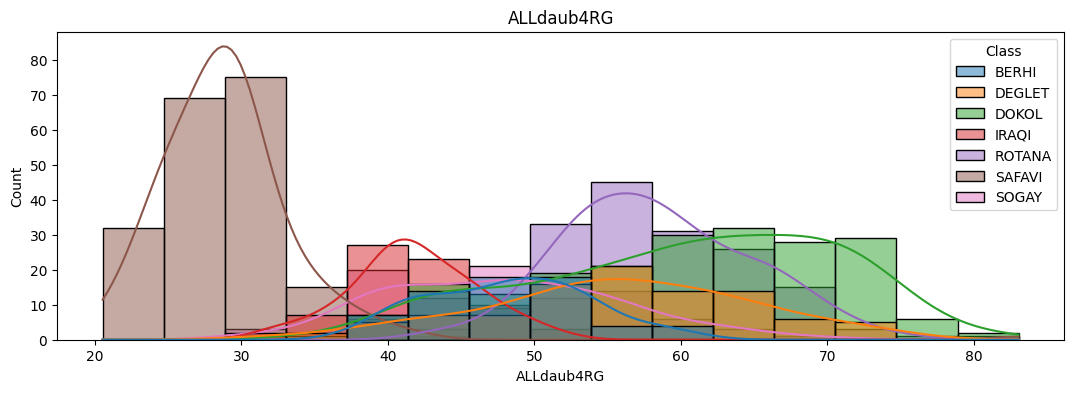

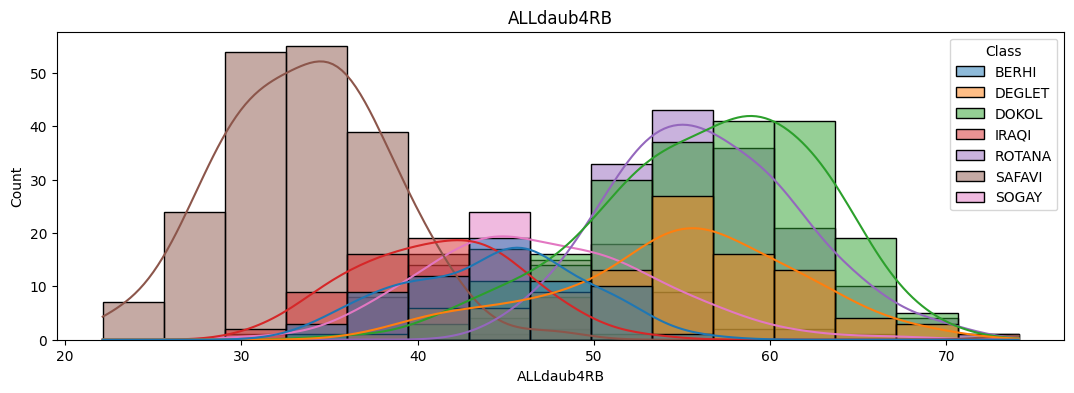

In [32]:
for column in dataframe_date_fruits.columns[:-1]:
  draw_distributions(dataframe_date_fruits[[column, 'Class']], column)

In [28]:
def draw_distribution1(feature, column, target):
    fig, axes = plt.subplots(nrows=1, figsize=(12, 5))
    axes.title.set_text(f'{column}')
    sns.boxplot(x=feature, y=target, ax=axes,color='c')
    plt.show()


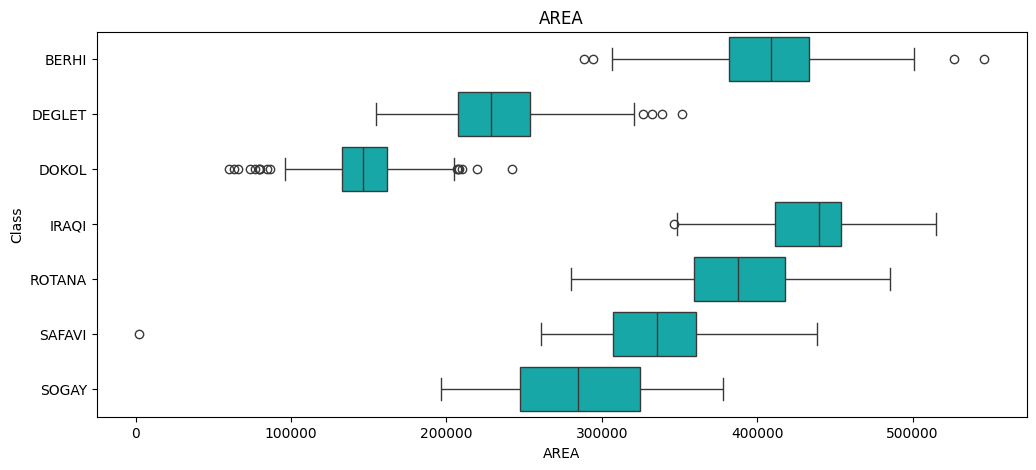

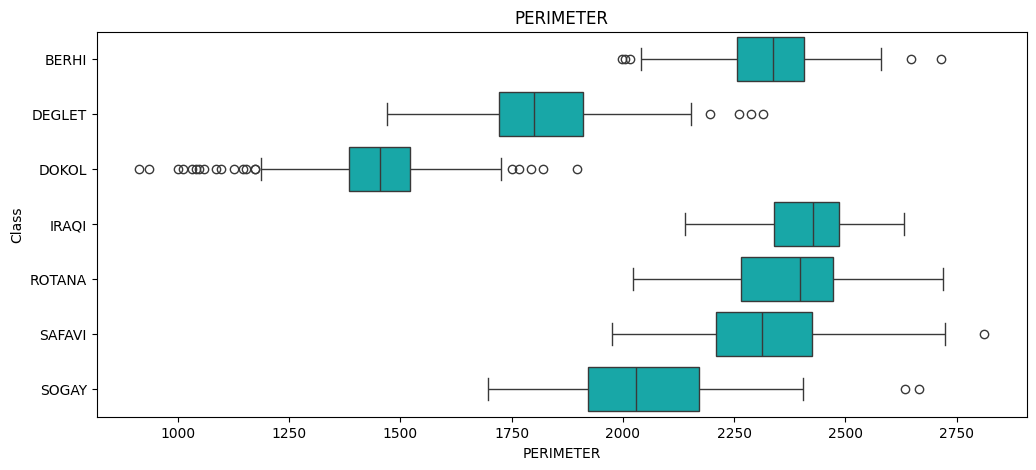

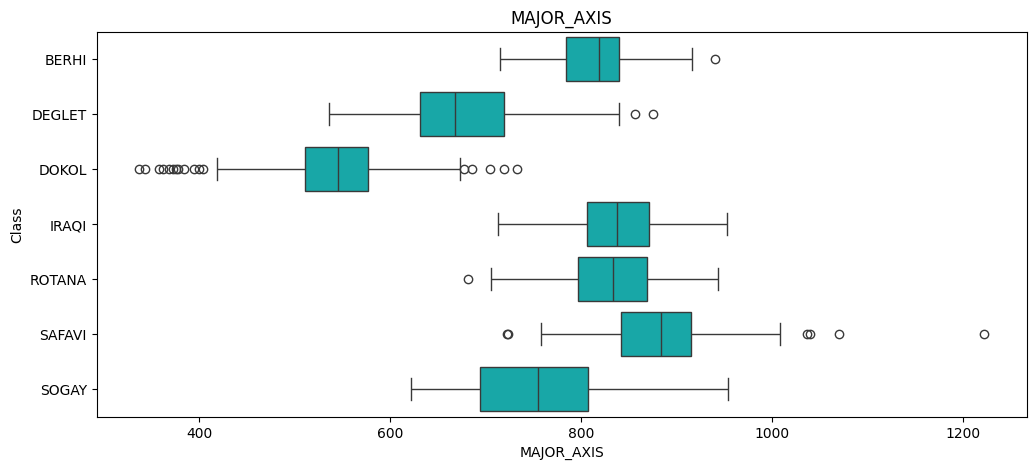

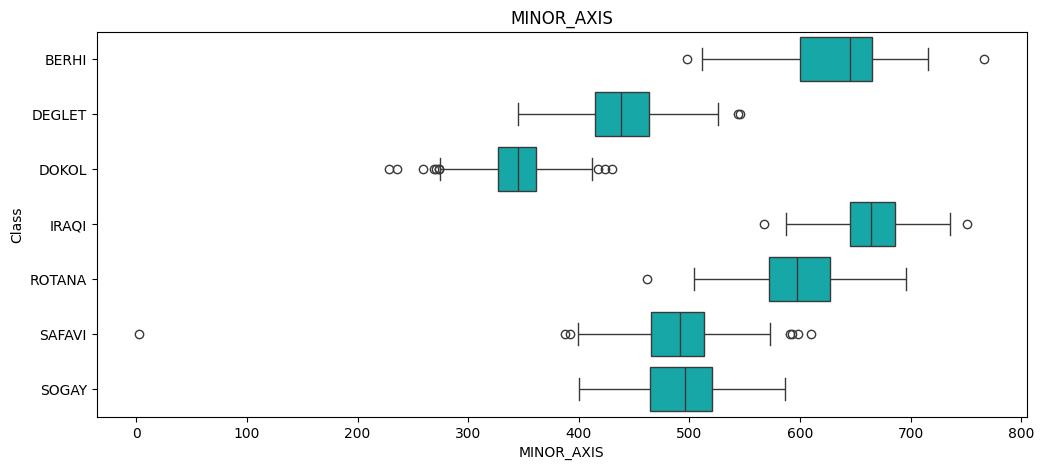

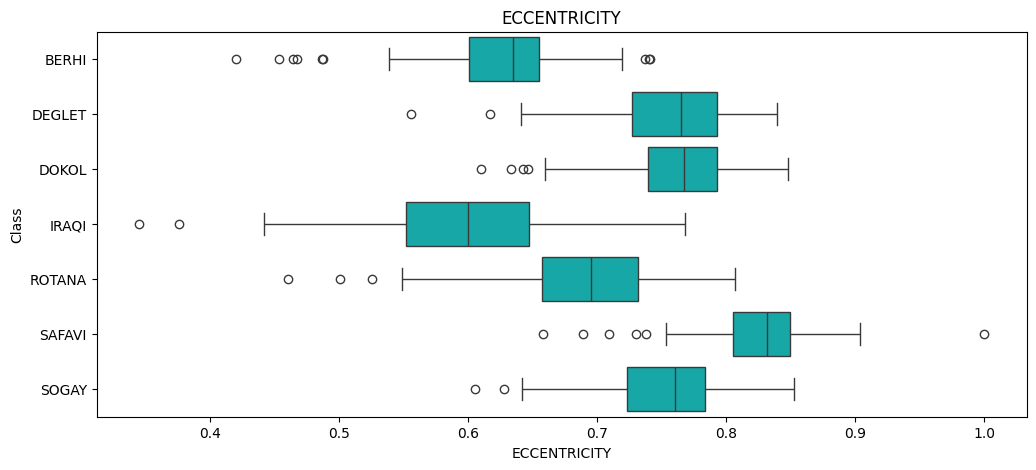

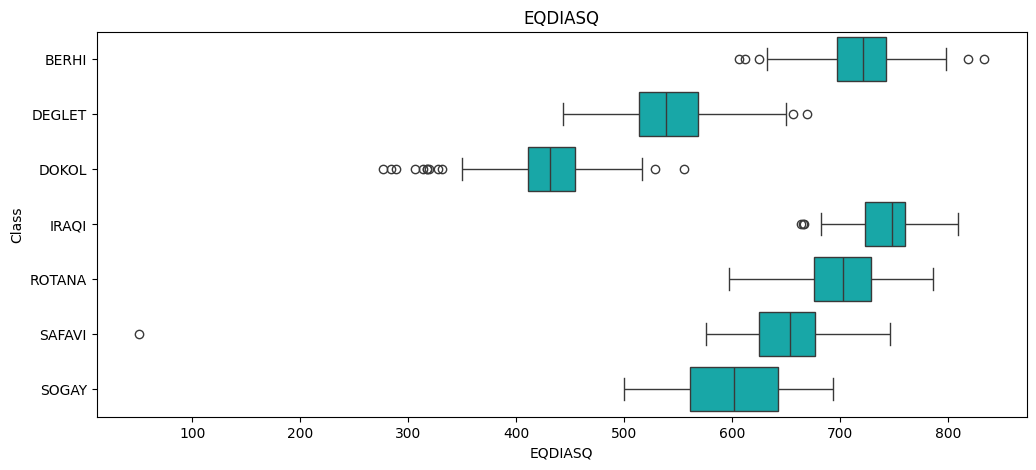

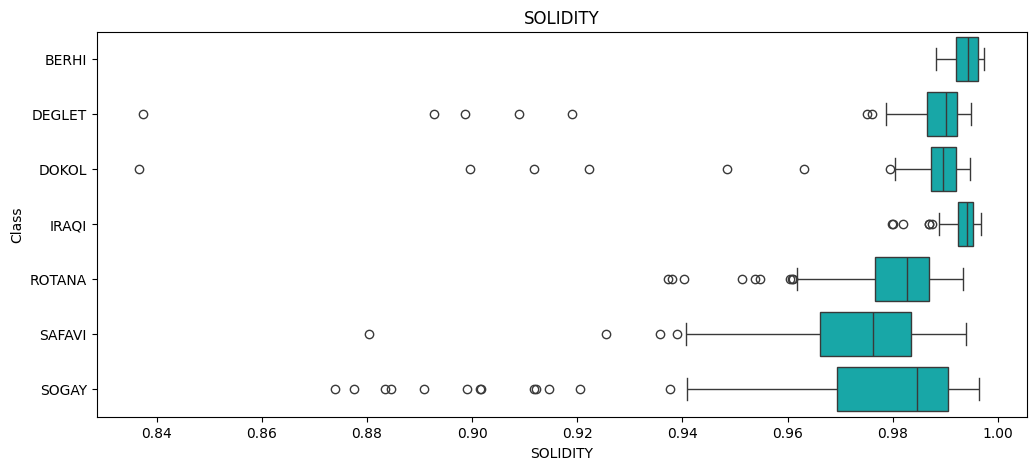

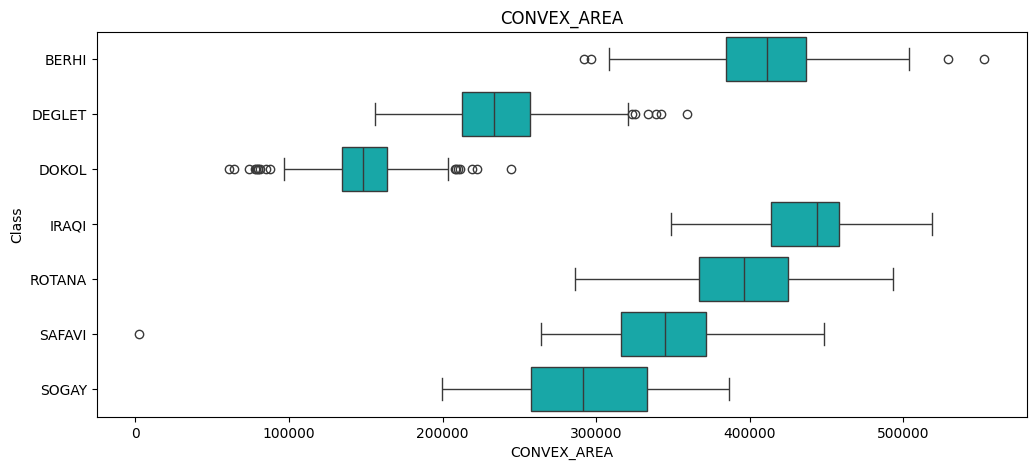

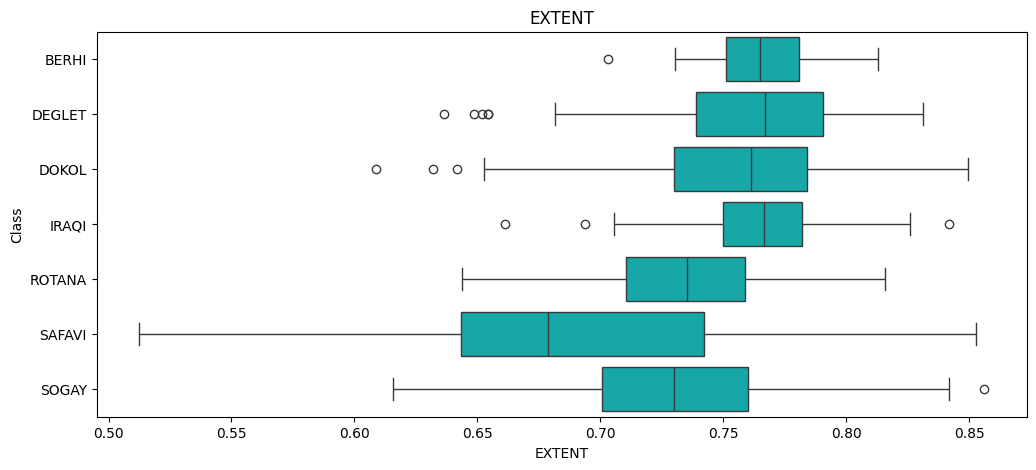

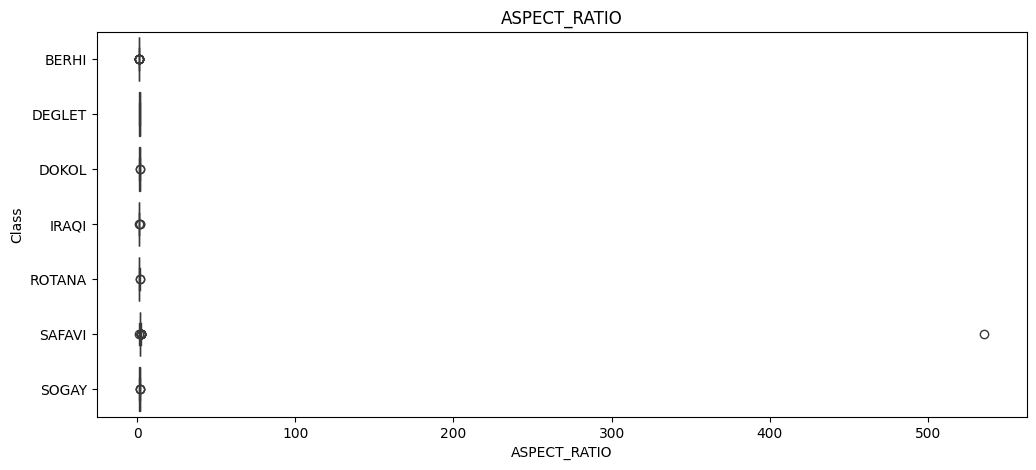

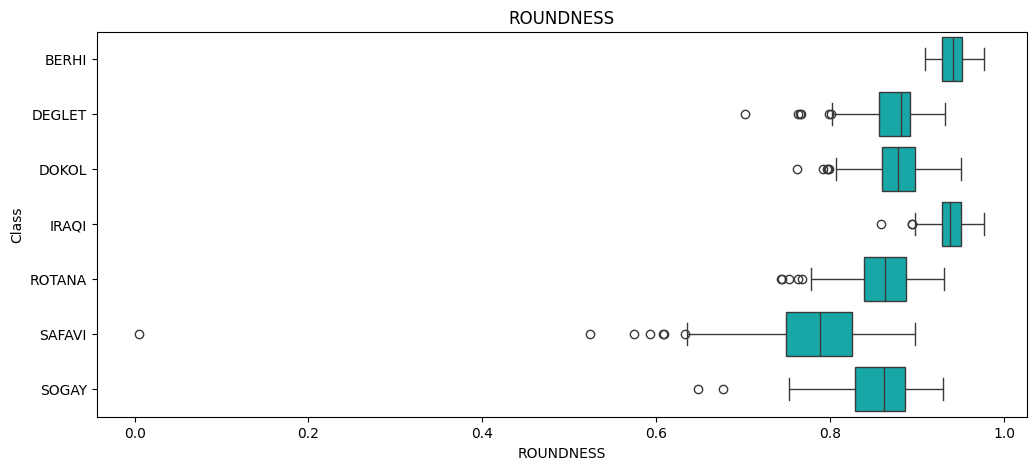

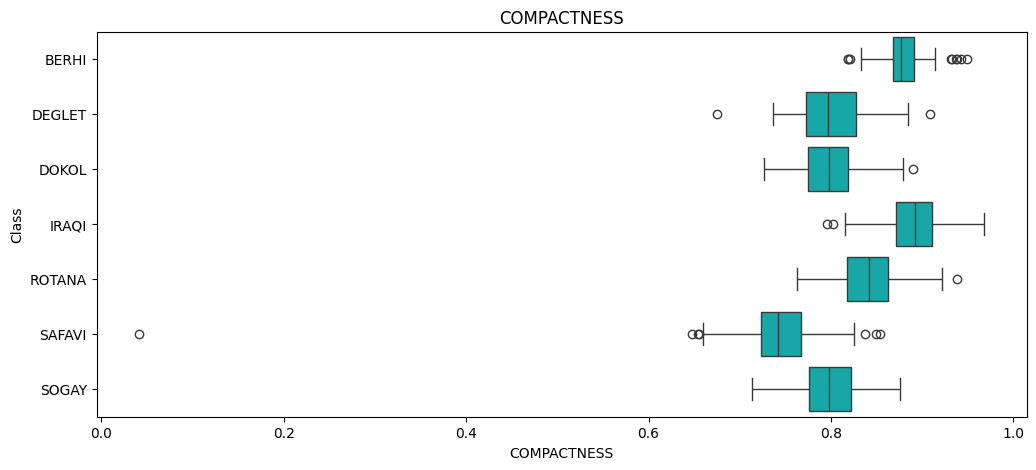

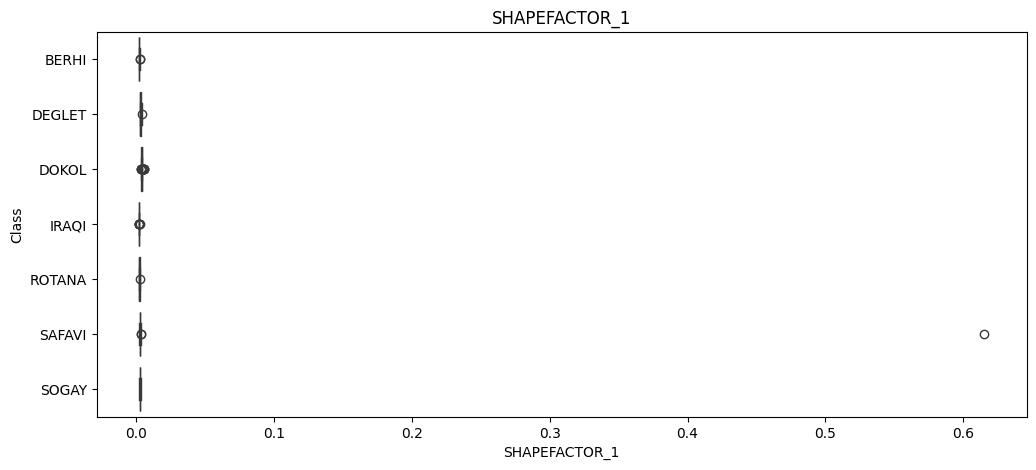

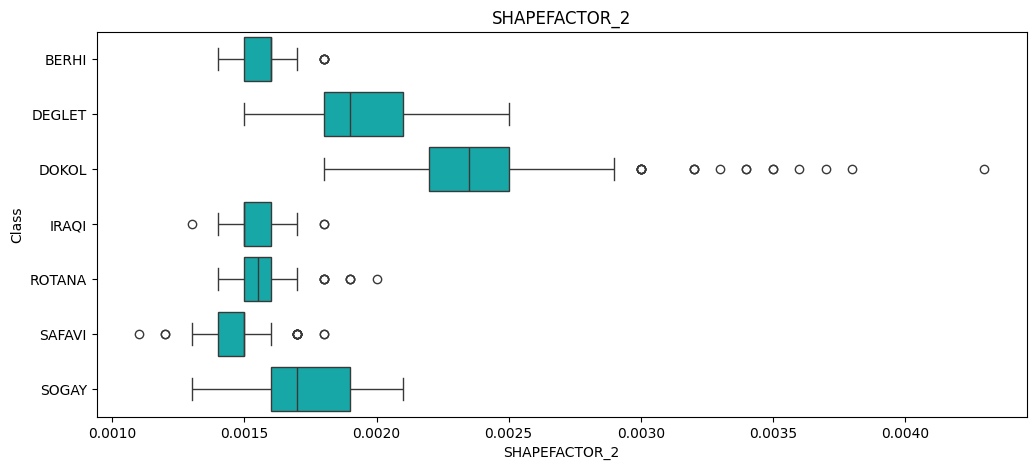

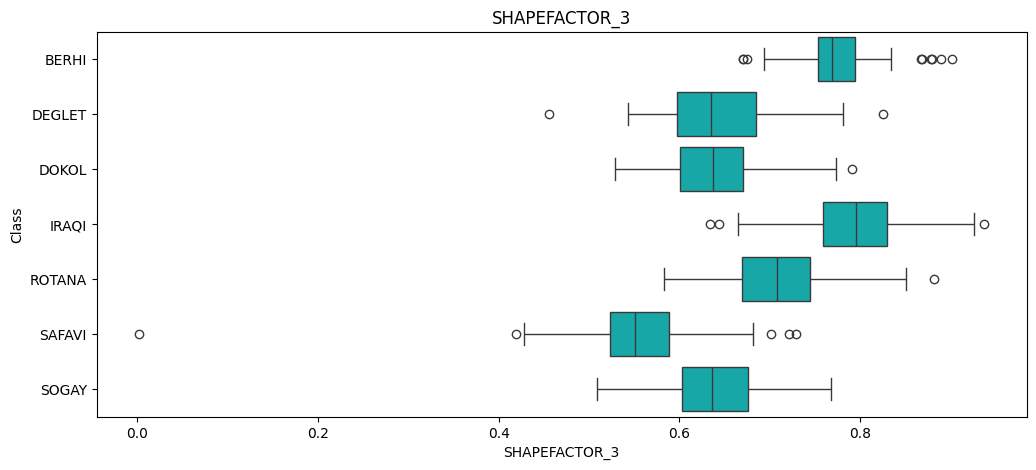

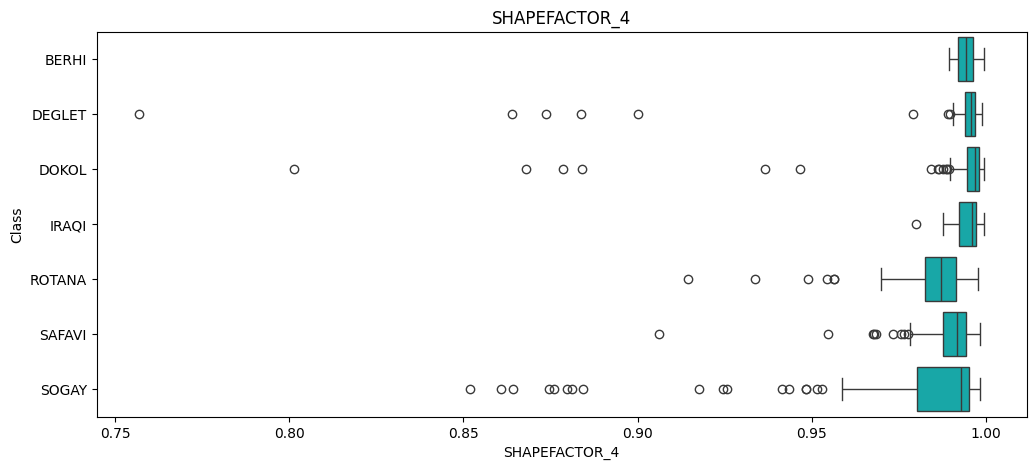

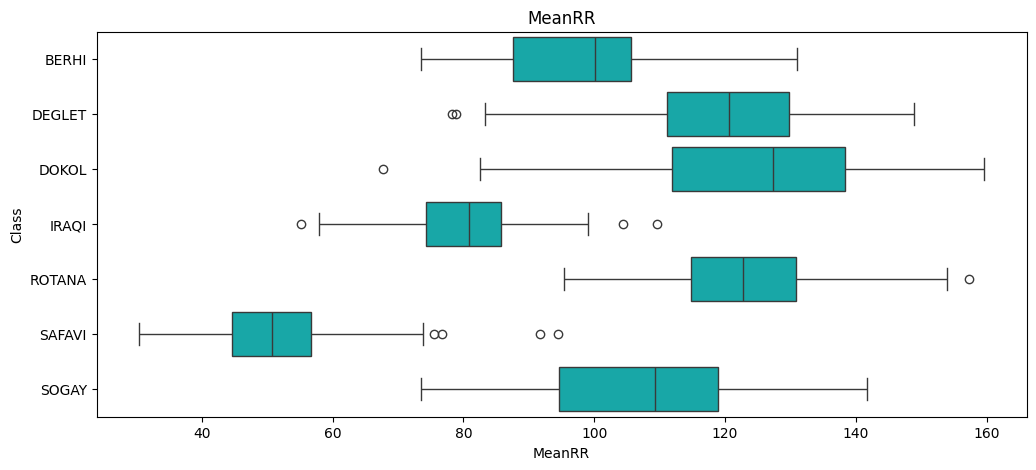

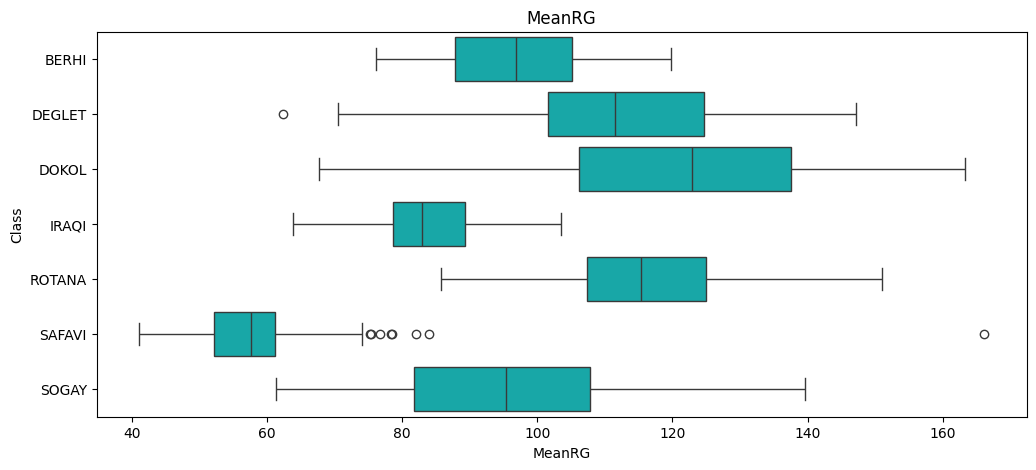

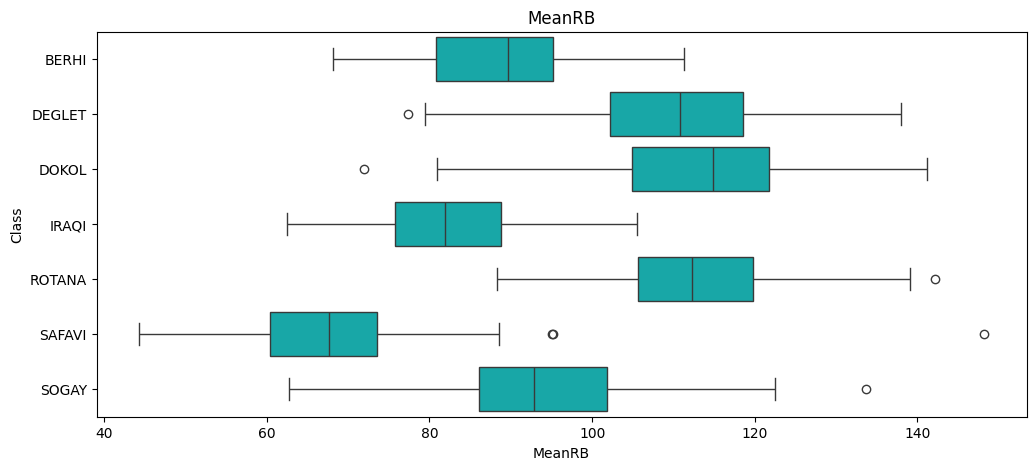

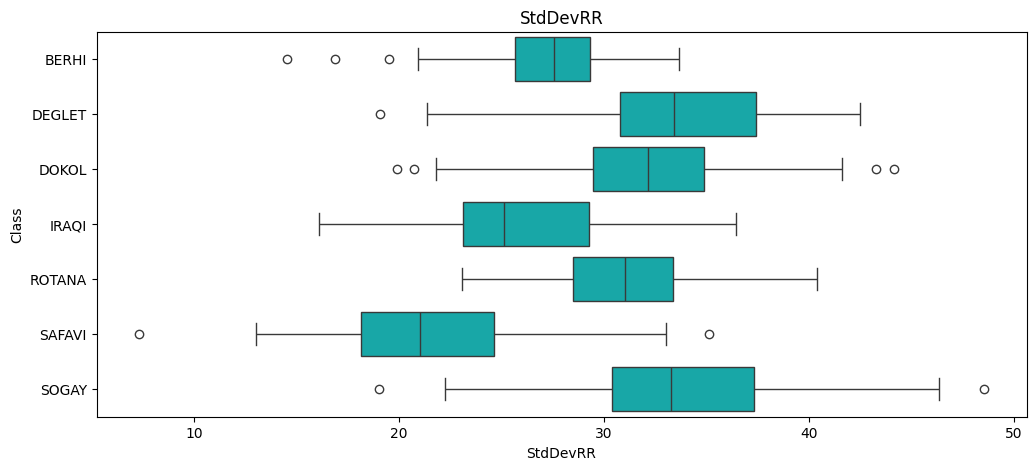

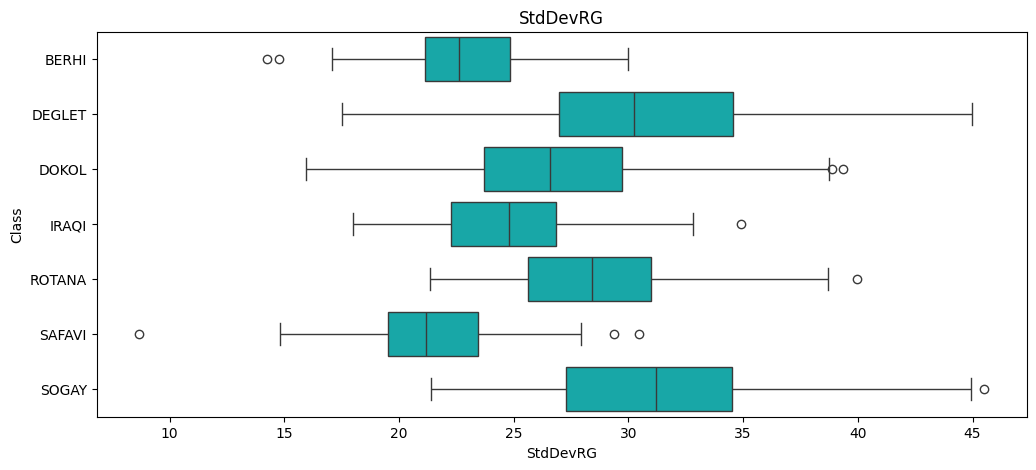

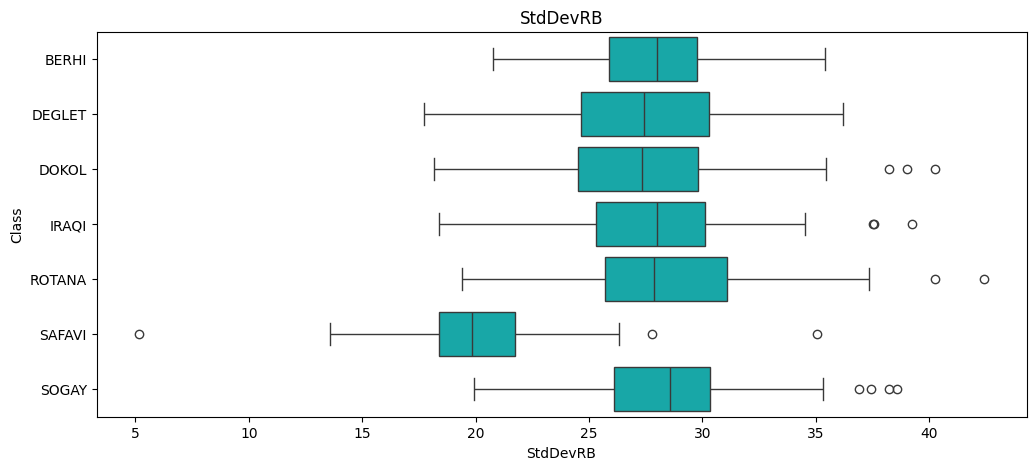

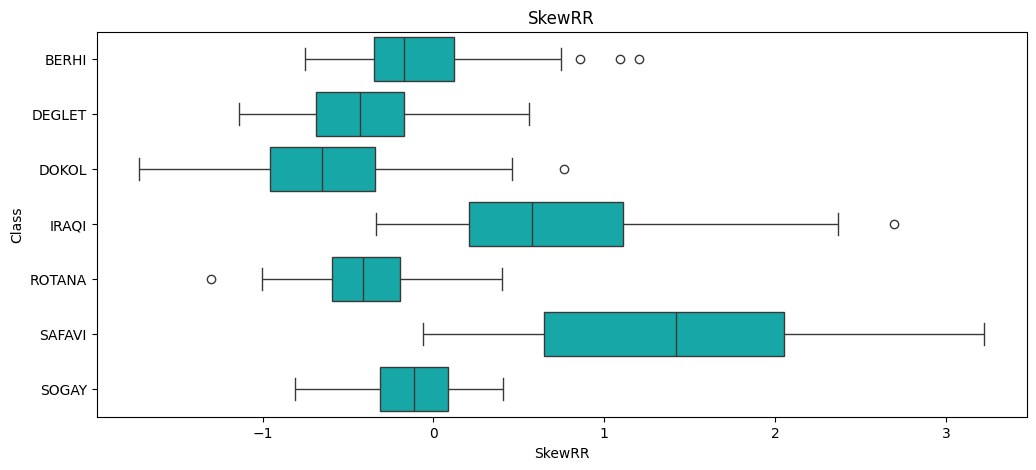

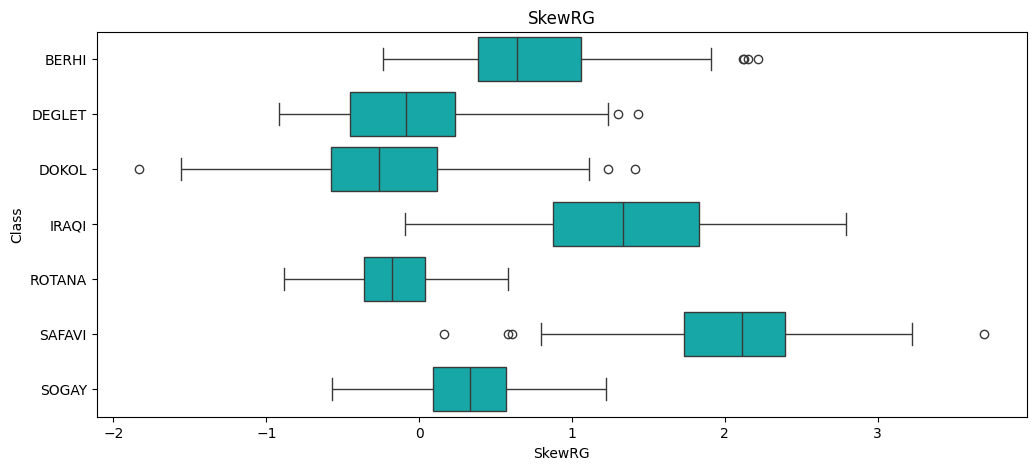

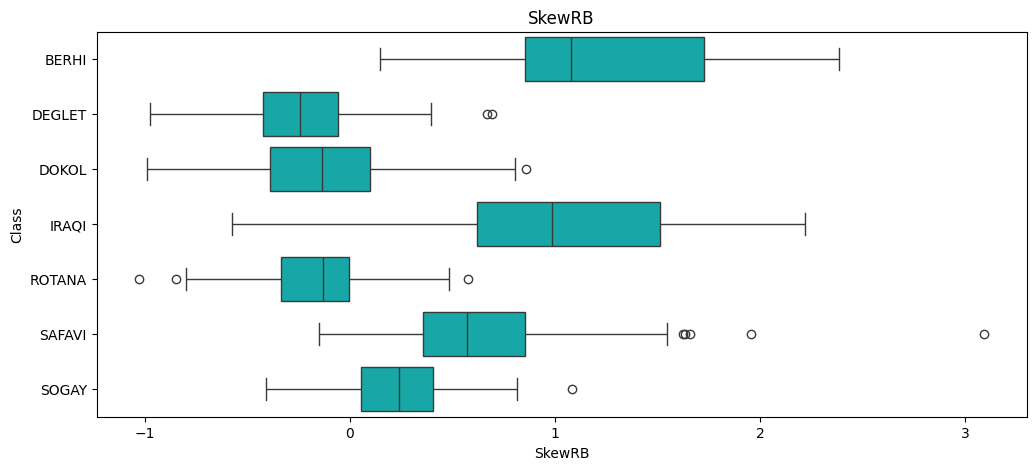

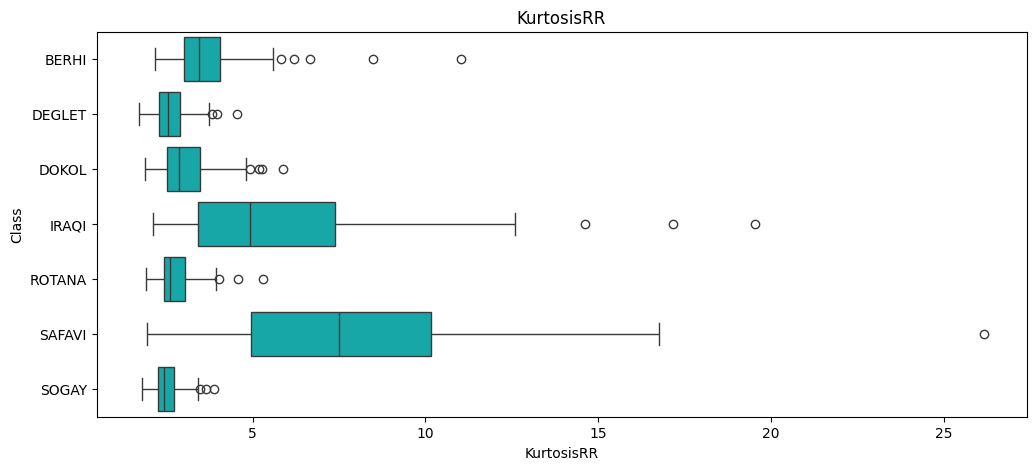

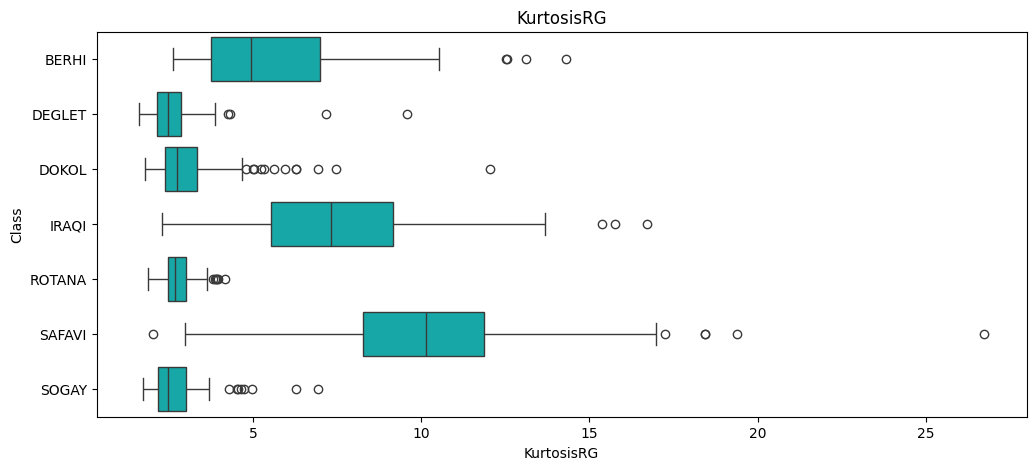

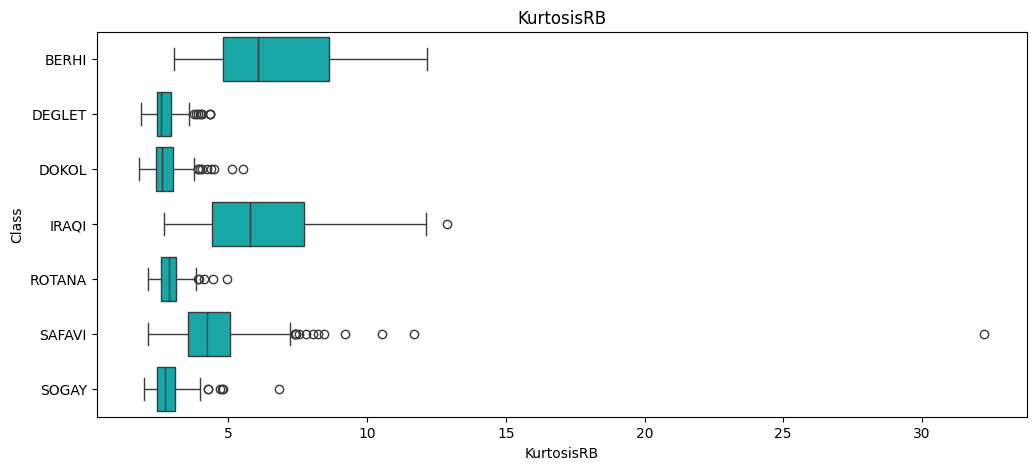

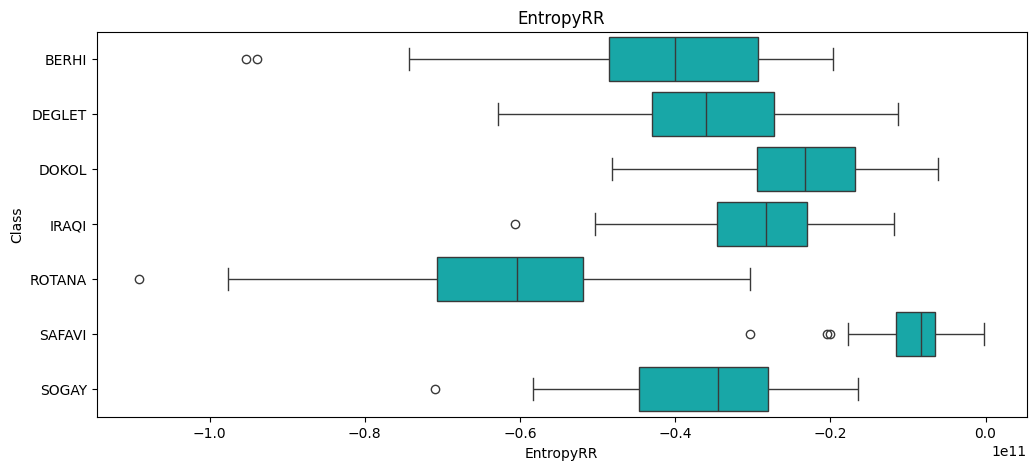

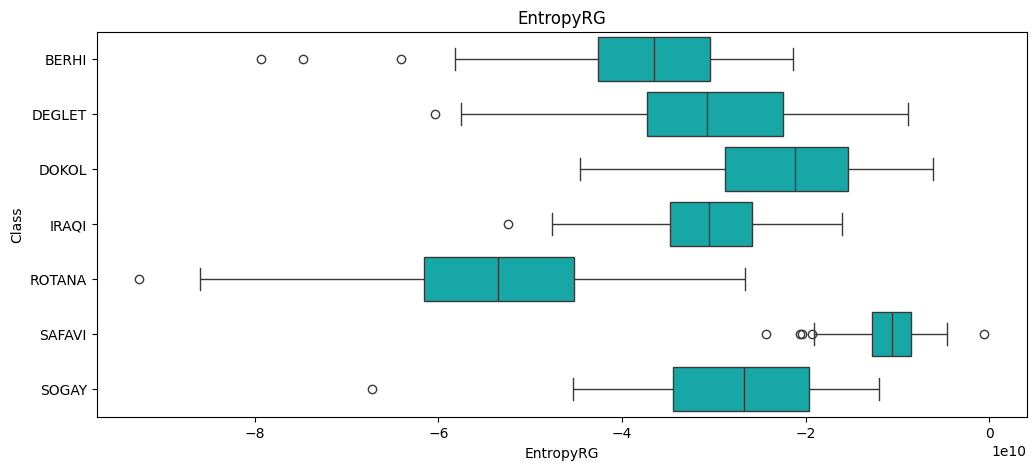

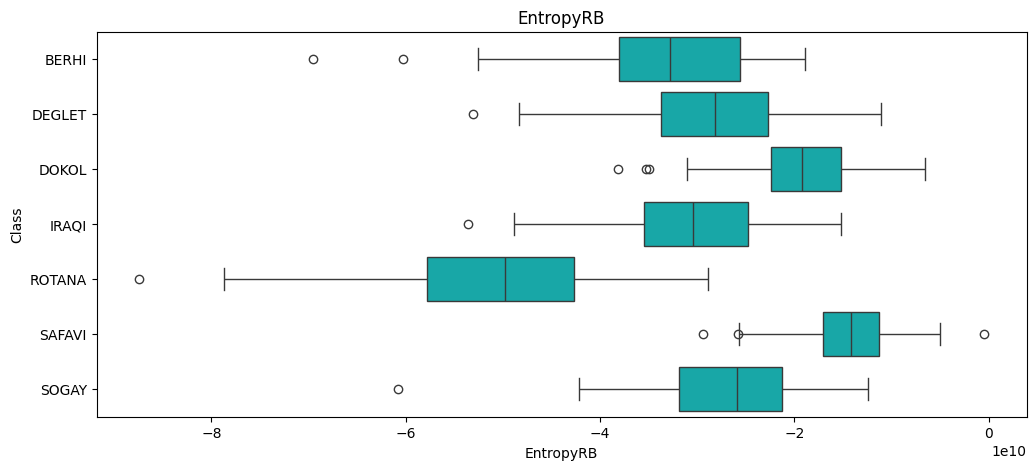

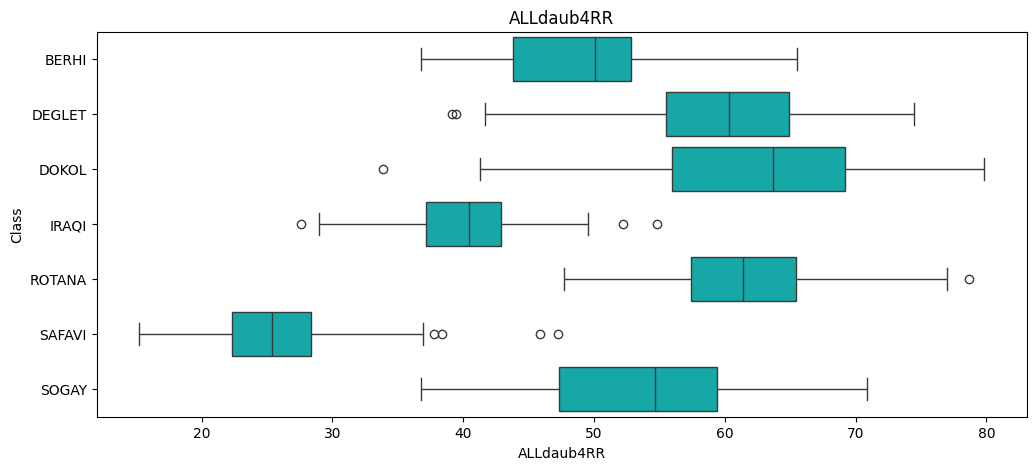

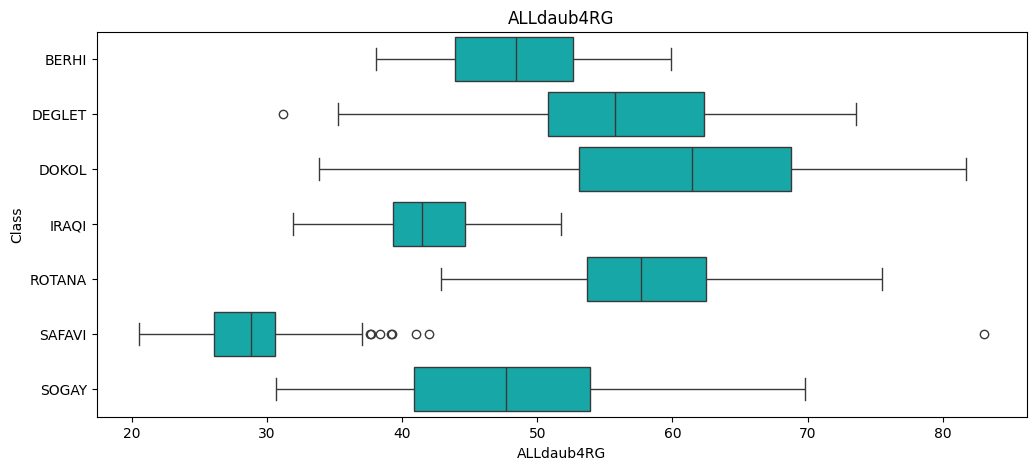

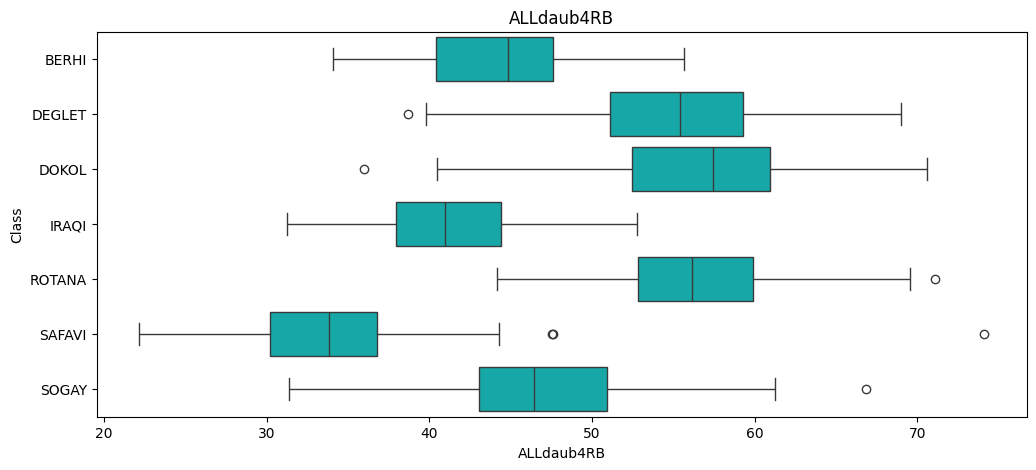

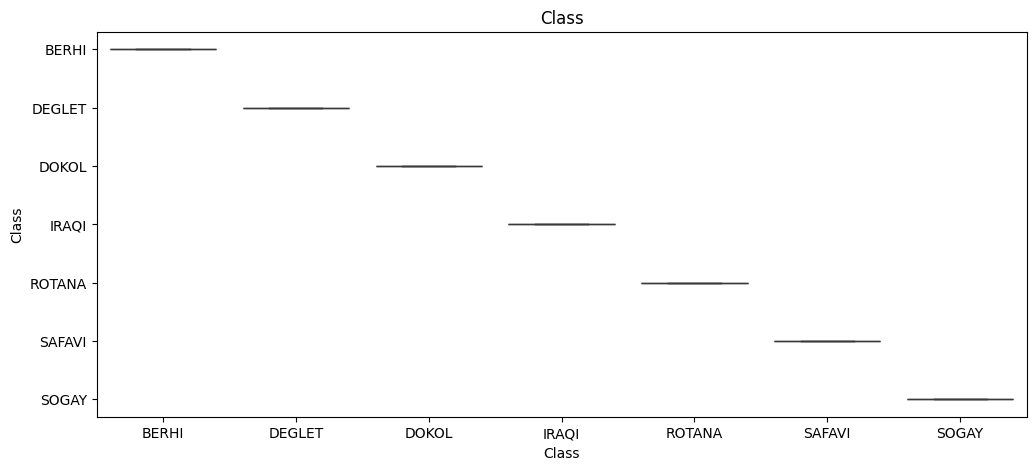

In [29]:
for column in dataframe_date_fruits.columns:
    draw_distribution1(dataframe_date_fruits[column], column, dataframe_date_fruits['Class'])